##**NLP TP FINAL**

###Tecnicatura Universitaria en Inteligencia Artificial - FCEIA - UNR

Comisión I - ** Cena, Lautaro**

*2025 - Segundo Cuatrimestre*



# Ejercicio 1

## carga datasets

In [1]:

!pip install -q gdown
import os, shutil, zipfile, gdown
import re
import requests


In [2]:


DATA_DIR = "/content/nlp_tp_datos"
os.makedirs(DATA_DIR, exist_ok=True)

FILES = {
    "devoluciones.csv":         "1d7gnv2CIe1D6AZqRtvfq8LgQDFz9MipX",
    "faqs.json":                "1qVXaGyfi26AJTC8X4j023fQaNrBgTb7t",
    "inventario_sucursales.csv":"1F5uxNYrIOX_CjJwk4ZikBn6ITJqLftPH",
    "productos.csv":            "1JJTAbX9Qmcf27bfBR_hzKpbmH9lCw0Za",
    "tickets_soporte.csv":      "1ScMJvDwD8QefNLYGdJy2hjcfyVPHPdPy",
    "vendedores.csv":           "1RimTjaauby-jgYAOWK2ZpA0_2IP2-qmD",
    "ventas_historicas.csv":    "1GLlQqlpop50fic9ErDfsLcpHleKKH24A",
}

print("Descargando archivos CSV / JSON...")
for name, fid in FILES.items():
    dest = os.path.join(DATA_DIR, name)
    if os.path.exists(dest):
        print(f"- {name} ya existe, se mantiene.")
    else:
        print(f"- Descargando {name}...")
        gdown.download(
            id=fid,
            output=dest,
            quiet=False,
            fuzzy=True,
            use_cookies=False
        )

print("\nArchivos descargados:")
print([f for f in os.listdir(DATA_DIR) if os.path.isfile(os.path.join(DATA_DIR, f))])


Descargando archivos CSV / JSON...
- Descargando devoluciones.csv...


Downloading...
From: https://drive.google.com/uc?id=1d7gnv2CIe1D6AZqRtvfq8LgQDFz9MipX
To: /content/nlp_tp_datos/devoluciones.csv
100%|██████████| 195k/195k [00:00<00:00, 43.5MB/s]


- Descargando faqs.json...


Downloading...
From: https://drive.google.com/uc?id=1qVXaGyfi26AJTC8X4j023fQaNrBgTb7t
To: /content/nlp_tp_datos/faqs.json
100%|██████████| 1.50M/1.50M [00:00<00:00, 26.9MB/s]


- Descargando inventario_sucursales.csv...


Downloading...
From: https://drive.google.com/uc?id=1F5uxNYrIOX_CjJwk4ZikBn6ITJqLftPH
To: /content/nlp_tp_datos/inventario_sucursales.csv
100%|██████████| 474k/474k [00:00<00:00, 27.1MB/s]


- Descargando productos.csv...


Downloading...
From: https://drive.google.com/uc?id=1JJTAbX9Qmcf27bfBR_hzKpbmH9lCw0Za
To: /content/nlp_tp_datos/productos.csv
100%|██████████| 235k/235k [00:00<00:00, 23.3MB/s]


- Descargando tickets_soporte.csv...


Downloading...
From: https://drive.google.com/uc?id=1ScMJvDwD8QefNLYGdJy2hjcfyVPHPdPy
To: /content/nlp_tp_datos/tickets_soporte.csv
100%|██████████| 418k/418k [00:00<00:00, 22.4MB/s]


- Descargando vendedores.csv...


Downloading...
From: https://drive.google.com/uc?id=1RimTjaauby-jgYAOWK2ZpA0_2IP2-qmD
To: /content/nlp_tp_datos/vendedores.csv
100%|██████████| 11.8k/11.8k [00:00<00:00, 23.0MB/s]


- Descargando ventas_historicas.csv...


Downloading...
From: https://drive.google.com/uc?id=1GLlQqlpop50fic9ErDfsLcpHleKKH24A
To: /content/nlp_tp_datos/ventas_historicas.csv
100%|██████████| 1.50M/1.50M [00:00<00:00, 55.4MB/s]


Archivos descargados:
['vendedores.csv', 'tickets_soporte.csv', 'faqs.json', 'ventas_historicas.csv', 'devoluciones.csv', 'inventario_sucursales.csv', 'productos.csv']


In [3]:

def drive_download(file_id: str, output_path: str, chunk_size: int = 1024*1024):
    """
    Descarga desde Google Drive por file_id manejando confirm token (cuando Drive muestra pantalla intermedia).
    """
    URL = "https://drive.google.com/uc?export=download"

    with requests.Session() as s:
        # 1) Primer request
        r = s.get(URL, params={"id": file_id}, stream=True)
        r.raise_for_status()

        # 2) Si Drive exige confirm, viene en cookies o en el HTML
        token = None
        for k, v in r.cookies.items():
            if k.startswith("download_warning"):
                token = v
                break

        if token is None:
            # Buscar token en HTML (a veces viene embebido)
            txt = ""
            try:
                txt = r.text
            except Exception:
                pass
            m = re.search(r'confirm=([0-9A-Za-z_]+)', txt)
            if m:
                token = m.group(1)

        # 3) Segundo request con confirm (si hizo falta)
        if token:
            r = s.get(URL, params={"id": file_id, "confirm": token}, stream=True)
            r.raise_for_status()

        # 4) Guardar
        with open(output_path, "wb") as f:
            for chunk in r.iter_content(chunk_size=chunk_size):
                if chunk:
                    f.write(chunk)


In [4]:


DATA_DIR = "/content/nlp_tp_datos"
os.makedirs(DATA_DIR, exist_ok=True)

ZIP_FILES = {

    "manuales_productos": "1E6zEPo5IvxOksonT305Rosk1LLad_JvI",
    "resenas_usuarios":   "1Uww_sba6nQ4mvsxG-FePiAVvzXBkMBVn",
}

def reset_dir(path):
    if os.path.exists(path):
        shutil.rmtree(path, ignore_errors=True)
    os.makedirs(path, exist_ok=True)

def download_and_unzip(name, file_id):
    dest_folder = os.path.join(DATA_DIR, name)
    reset_dir(dest_folder)

    zip_path = os.path.join(DATA_DIR, f"{name}.zip")
    if os.path.exists(zip_path):
        os.remove(zip_path)

    print(f"⬇️ Bajando {name}.zip ...")
    drive_download(file_id, zip_path)

    print(f"📦 Descomprimiendo en {dest_folder} ...")
    with zipfile.ZipFile(zip_path, "r") as z:
        z.extractall(dest_folder)

    # a veces el zip viene con una carpeta adentro -> aplanamos si hace falta
    inner = os.path.join(dest_folder, name)
    if os.path.isdir(inner):
        for f in os.listdir(inner):
            shutil.move(os.path.join(inner, f), os.path.join(dest_folder, f))
        shutil.rmtree(inner, ignore_errors=True)

    cant = len([f for f in os.listdir(dest_folder) if os.path.isfile(os.path.join(dest_folder,f))])
    print(f"✅ {name}: {cant} archivos.\n")

for name, fid in ZIP_FILES.items():
    download_and_unzip(name, fid)

print("📌 Listo. DATA_DIR =", DATA_DIR)


⬇️ Bajando manuales_productos.zip ...
📦 Descomprimiendo en /content/nlp_tp_datos/manuales_productos ...
✅ manuales_productos: 50 archivos.

⬇️ Bajando resenas_usuarios.zip ...
📦 Descomprimiendo en /content/nlp_tp_datos/resenas_usuarios ...
✅ resenas_usuarios: 5015 archivos.

📌 Listo. DATA_DIR = /content/nlp_tp_datos


In [5]:


base_path = "/content/nlp_tp_datos"

print("Contenido encontrado:")
for item in os.listdir(base_path):
    print("-", item)


Contenido encontrado:
- vendedores.csv
- resenas_usuarios
- manuales_productos.zip
- tickets_soporte.csv
- faqs.json
- ventas_historicas.csv
- devoluciones.csv
- resenas_usuarios.zip
- inventario_sucursales.csv
- manuales_productos
- productos.csv



---

### Carga y preparación de los datasets

Como primer paso del trabajo, se realiza la descarga y preparación de los distintos conjuntos de datos que alimentan el sistema. Estos datos provienen de fuentes heterogéneas y cumplen roles diferentes dentro de la arquitectura propuesta.

Por un lado, se descargan archivos estructurados en formato CSV y JSON, que contienen información tabular vinculada a productos, inventario, ventas, devoluciones, vendedores, tickets de soporte y preguntas frecuentes. Estos archivos constituyen la base de datos tabular del sistema y se cargan de manera directa, ya que su tamaño y formato permiten una descarga simple y reproducible.

Por otro lado, los documentos textuales utilizados para la base vectorial —manuales de productos y reseñas de usuarios— presentan un volumen considerablemente mayor y una estructura compuesta por múltiples archivos individuales. Para garantizar una descarga robusta y reproducible de estos conjuntos, se opta por distribuirlos en archivos comprimidos (ZIP), que luego son descomprimidos localmente.

Este enfoque evita problemas habituales asociados a la descarga directa de carpetas desde Google Drive, tales como interrupciones por límites de archivos, confirmaciones intermedias o inconsistencias en el contenido descargado. De este modo, se asegura que el conjunto completo de documentos textuales esté disponible antes de avanzar con las etapas de fragmentación, generación de embeddings y recuperación semántica.

Finalmente, se incluye una verificación explícita del contenido descargado, comprobando la existencia y cantidad de archivos en cada directorio. Esta validación temprana permite detectar errores en la carga de datos antes de ejecutar los pipelines posteriores del sistema.

---


## Fuentes de datos

### Carga tabla Vectorial

In [6]:
# Instalar dependencias
!pip install -q sentence-transformers faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 85.4 MB/s eta 0:00:00


In [7]:
import os
import json
import re
import pandas as pd
from sentence_transformers import SentenceTransformer
import numpy as np
import faiss

“Base vectorial (RAG): construcción del corpus, chunking, embeddings e indexado FAISS. Se incorporan metadatos (tipo/fuente/producto) para permitir búsquedas filtradas.”

In [8]:


base_path = "/content/nlp_tp_datos"


path_manuales   = os.path.join(base_path, "manuales_productos")
path_resenas    = os.path.join(base_path, "resenas_usuarios")
path_faqs       = os.path.join(base_path, "faqs.json")
path_productos  = os.path.join(base_path, "productos.csv")

print("Carpeta manuales_productos:", path_manuales)
print("Carpeta resenas_usuarios  :", path_resenas)
print("Archivo faqs.json         :", path_faqs)

print("\nEjemplo de archivos en manuales_productos:")
print(os.listdir(path_manuales)[:5]) #chequeo

print("\nEjemplo de archivos en resenas_usuarios:")
print(os.listdir(path_resenas)[:5]) #chequeo

# Cargar FAQs
with open(path_faqs, "r", encoding="utf-8") as f:
    faqs_data = json.load(f)

print("\nCantidad de FAQs cargadas:", len(faqs_data))


Carpeta manuales_productos: /content/nlp_tp_datos/manuales_productos
Carpeta resenas_usuarios  : /content/nlp_tp_datos/resenas_usuarios
Archivo faqs.json         : /content/nlp_tp_datos/faqs.json

Ejemplo de archivos en manuales_productos:
['manual_P0259_Secarropa.md', 'manual_P0112_Deluxe_Frigobar.md', 'manual_P0117_Digital_Vinoteca.md', 'manual_P0004_Compacto_Licuadora.md', 'manual_P0177_Super_Panel_Calefactor_Plus.md']

Ejemplo de archivos en resenas_usuarios:
['resena_R01177.txt', 'resena_R00830(1).txt', 'resena_R01627.txt', 'resena_R01536.txt', 'resena_R00523.txt']

Cantidad de FAQs cargadas: 3000


“Unificamos manuales, reseñas y FAQs en una estructura común (vector_docs) agregando metadata (tipo, fuente, id de producto y origen). Para FAQs se normalizan nombres contra productos.csv, permitiendo asociarlas a uno o varios productos.”

In [9]:




# -------------------------
# 1) Mapeos desde productos.csv
# -------------------------
df_prod = pd.read_csv(path_productos)

def norm_name(s: str) -> str:
    return re.sub(r"\s+", " ", str(s).strip().lower())

# nombre_normalizado -> lista de id_producto (NO uno solo)
map_nombre_a_ids = {}
for _, row in df_prod.iterrows():
    key = norm_name(row["nombre"])
    map_nombre_a_ids.setdefault(key, []).append(str(row["id_producto"]))

# fallback: si FAQ trae un nombre genérico (ej "Licuadora"), buscamos IDs por "contiene"
def ids_por_contiene(nombre_generico: str):
    ng = norm_name(nombre_generico)
    mask = df_prod["nombre"].astype(str).str.lower().str.contains(ng, regex=False)
    return df_prod.loc[mask, "id_producto"].astype(str).tolist()

print("Map nombre->ids OK. Ejemplo:", list(map_nombre_a_ids.items())[:3])

# -------------------------
# 2) Construcción vector_docs con metadata
# -------------------------
vector_docs = []

# Manuales
for filename in os.listdir(path_manuales):
    if filename.endswith(".md"):
        with open(os.path.join(path_manuales, filename), "r", encoding="utf-8") as f:
            texto = f.read()
        m = re.search(r"(P\d{4})", filename)
        producto_id = m.group(1) if m else None

        vector_docs.append({
            "id": f"manual_{filename}",
            "tipo": "manual",
            "fuente": "manuales_productos",
            "producto_id": producto_id,
            "origen": filename,
            "texto": texto
        })

# Reseñas
for filename in os.listdir(path_resenas):
    if filename.endswith(".txt"):
        with open(os.path.join(path_resenas, filename), "r", encoding="utf-8") as f:
            texto = f.read()
        m = re.search(r"(P\d{4})", filename)
        producto_id = m.group(1) if m else None

        vector_docs.append({
            "id": f"resena_{filename}",
            "tipo": "resena",
            "fuente": "resenas_usuarios",
            "producto_id": producto_id,
            "origen": filename,
            "texto": texto
        })

# FAQs (lo importante: producto_ids LISTA)
with open(path_faqs, "r", encoding="utf-8") as f:
    faqs_data = json.load(f)

for i, item in enumerate(faqs_data):
    producto_nombre = str(item.get("nombre_producto", "")).strip()

    # 1) match exacto (lista)
    producto_ids = map_nombre_a_ids.get(norm_name(producto_nombre), [])

    # 2) si no hay match, fallback por contiene (para genéricos tipo "Licuadora")
    if not producto_ids and producto_nombre:
        producto_ids = ids_por_contiene(producto_nombre)

    texto = (
        f"Producto: {producto_nombre}. "
        f"Pregunta: {item.get('pregunta','')} "
        f"Respuesta: {item.get('respuesta','')}"
    )

    vector_docs.append({
        "id": f"faq_{i}",
        "tipo": "faq",
        "fuente": "faqs",
        "producto_nombre": producto_nombre,
        "producto_ids": producto_ids,     # <-- LISTA (clave del arreglo)
        "origen": "faqs.json",
        "texto": texto
    })

print("Total vector_docs:", len(vector_docs))
print("Ejemplo manual:", next(d for d in vector_docs if d["tipo"]=="manual"))
print("Ejemplo faq:", next(d for d in vector_docs if d["tipo"]=="faq"))


Map nombre->ids OK. Ejemplo: [('licuadora', ['P0001', 'P0002', 'P0005', 'P0006', 'P0007']), ('plus licuadora pro', ['P0003']), ('compacto licuadora', ['P0004'])]
Total vector_docs: 8065
Ejemplo manual: {'id': 'manual_manual_P0259_Secarropa.md', 'tipo': 'manual', 'fuente': 'manuales_productos', 'producto_id': 'P0259', 'origen': 'manual_P0259_Secarropa.md', 'texto': '# Manual Técnico - Secarropa\n\n**Modelo:** P0259 | **Marca:** FreshWash\n\n---\n\n## Índice\n\n1. [Especificaciones Técnicas](#especificaciones-técnicas)\n2. [Componentes Principales](#componentes-principales)\n3. [Procedimientos de Uso](#procedimientos-de-uso)\n4. [Compatibilidad y Relaciones](#compatibilidad-y-relaciones)\n5. [Solución de Problemas](#solución-de-problemas)\n6. [Mantenimiento Preventivo](#mantenimiento-preventivo)\n7. [Información de Garantía](#información-de-garantía)\n8. [Contacto y Soporte](#contacto-y-soporte)\n\n---\n\n## Especificaciones Técnicas\n\n- **Modelo:** P0259\n- **Nombre Comercial:** Secarr

In [10]:
"""# Modelo de embeddings en español
EMBEDDING_MODEL_NAME = "hiiamsid/sentence_similarity_spanish_es"
embedding_model = SentenceTransformer(EMBEDDING_MODEL_NAME)
"""

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/701 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/556 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

“Se divide cada documento en chunks solapados para preservar contexto y mejorar la recuperación.”

In [11]:
# Parámetros del Text Splitter
CHUNK_SIZE = 800
CHUNK_OVERLAP = 200

def split_text(text, chunk_size=CHUNK_SIZE, chunk_overlap=CHUNK_OVERLAP):
    if len(text) <= chunk_size:
        return [text]

    chunks = []
    step = chunk_size - chunk_overlap
    start = 0

    while start < len(text):
        end = start + chunk_size
        chunks.append(text[start:end])
        if end >= len(text):
            break
        start += step

    return chunks


vector_chunks = []

for doc in vector_docs:
    texto = doc["texto"]
    chunks = split_text(texto)

    for i, chunk in enumerate(chunks):
        vector_chunks.append({
            "id": f"{doc['id']}_ch{i}",
            "tipo": doc["tipo"],              # manual / resena / faq
            "fuente": doc.get("fuente"),      # ya viene seteado en vector_docs
            "producto_id": doc.get("producto_id"),       # manual/resena
            "producto_ids": doc.get("producto_ids"),     # faq (lista)
            "producto_nombre": doc.get("producto_nombre"),
            "origen": doc["origen"],
            "texto": chunk
        })

print("Cantidad de documentos originales:", len(vector_docs))
print("Cantidad de chunks generados:", len(vector_chunks))
print("Ejemplo de chunk con metadata:")
print(vector_chunks[0])


Cantidad de documentos originales: 8065
Cantidad de chunks generados: 8575
Ejemplo de chunk con metadata:
{'id': 'manual_manual_P0259_Secarropa.md_ch0', 'tipo': 'manual', 'fuente': 'manuales_productos', 'producto_id': 'P0259', 'producto_ids': None, 'producto_nombre': None, 'origen': 'manual_P0259_Secarropa.md', 'texto': '# Manual Técnico - Secarropa\n\n**Modelo:** P0259 | **Marca:** FreshWash\n\n---\n\n## Índice\n\n1. [Especificaciones Técnicas](#especificaciones-técnicas)\n2. [Componentes Principales](#componentes-principales)\n3. [Procedimientos de Uso](#procedimientos-de-uso)\n4. [Compatibilidad y Relaciones](#compatibilidad-y-relaciones)\n5. [Solución de Problemas](#solución-de-problemas)\n6. [Mantenimiento Preventivo](#mantenimiento-preventivo)\n7. [Información de Garantía](#información-de-garantía)\n8. [Contacto y Soporte](#contacto-y-soporte)\n\n---\n\n## Especificaciones Técnicas\n\n- **Modelo:** P0259\n- **Nombre Comercial:** Secarropa\n- **Categoría:** Lavado - Secado\n- **Ma

In [16]:
"""# Creamos la matriz de textos de los chunks
texts = [chunk["texto"] for chunk in vector_chunks]

# Calculamos los embeddings (como numpy array)
embeddings = embedding_model.encode(texts, convert_to_numpy=True)

# Aseguramos tipo float32 para FAISS
embeddings = embeddings.astype("float32")

# Dimensión de los vectores
d = embeddings.shape[1]

# Creamos índice FAISS (búsqueda exacta L2; simple y suficiente para el TP)
index = faiss.IndexFlatL2(d)
index.add(embeddings)

print("Dimensión de embeddings:", d)
print("Cantidad de vectores indexados:", index.ntotal)
"""

import numpy as np
import faiss
from sentence_transformers import SentenceTransformer

# Modelo liviano y rápido
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Opcional: reducir temporalmente la cantidad de documentos
# para desarrollo rápido
# MAX_DOCS = 2000
# texts = [chunk["texto"] for chunk in vector_chunks[:MAX_DOCS]]

# Versión completa (puede tardar 15–25 min, NO 6 horas)
texts = [chunk["texto"] for chunk in vector_chunks]

print(f"Total de chunks a procesar: {len(texts)}")

embeddings = embedding_model.encode(
    texts,
    convert_to_numpy=True,
    batch_size=64,          # tamaño óptimo en CPU
    show_progress_bar=True  # barra de progreso visible
)

embeddings = embeddings.astype("float32")

d = embeddings.shape[1]


index = faiss.IndexFlatL2(d)
index.add(embeddings)

print("================================")
print("Dimensión de vectores:", d)
print("Vectores indexados en FAISS:", index.ntotal)
print("================================")



modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Total de chunks a procesar: 8575


Batches:   0%|          | 0/134 [00:00<?, ?it/s]

Dimensión de vectores: 384
Vectores indexados en FAISS: 8575


Se implementa búsqueda por similitud semántica con filtros opcionales por tipo/fuente/producto, aprovechando la metadata asociada a cada chunk.

In [17]:
def buscar_vectorial(query, k=5, tipo=None, producto_id=None, fuente=None):
    q_emb = embedding_model.encode([query], convert_to_numpy=True).astype("float32")


    k_busqueda = len(vector_chunks)
    distances, indices = index.search(q_emb, k_busqueda)

    resultados = []
    for dist, idx in zip(distances[0], indices[0]):
        if idx >= len(vector_chunks): continue
        chunk = vector_chunks[idx]

        # --- FILTRO DE TIPO ---
        if tipo and chunk.get("tipo") != tipo:
            continue

        # --- FILTRO DE FUENTE ---
        if fuente and chunk.get("fuente") != fuente:
            continue

        # --- FILTRO DE PRODUCTO (Soporta singular y plural) ---
        if producto_id:
            pid_singular = chunk.get("producto_id") # Para manuales
            pids_lista = chunk.get("producto_ids") or [] # Para FAQs

            if pid_singular != producto_id and producto_id not in pids_lista:
                continue

        # Retornamos el diccionario plano para evitar KeyErrors
        resultados.append({
            "id": chunk.get("id"),
            "tipo": chunk.get("tipo"),
            "fuente": chunk.get("fuente"),
            "origen": chunk.get("origen"),
            "texto": chunk.get("texto"),
            "distancia": float(dist)
        })

        if len(resultados) >= k:
            break

    return resultados

“Ejemplos de consultas vectoriales (FAQs con filtro por tipo y producto).

In [18]:
ejemplo = buscar_vectorial(
    query="¿Qué voltaje requiere la licuadora?",
    k=3,
    tipo="faq"   # filtramos solo FAQs
)

for r in ejemplo:
    print("\nID:", r["id"])
    print("Tipo:", r["tipo"], "| Origen:", r["origen"])
    print("Distancia:", r["distancia"])
    print("Texto (primeras 200 chars):")
    print(r["texto"][:200], "...")



ID: faq_0_ch0
Tipo: faq | Origen: faqs.json
Distancia: 0.574364423751831
Texto (primeras 200 chars):
Producto: Licuadora. Pregunta: ¿Qué voltaje requiere? Respuesta: El Licuadora funciona con 12V. El consumo es de 650W. Recomendamos usar un estabilizador de tensión. ...

ID: faq_35_ch0
Tipo: faq | Origen: faqs.json
Distancia: 0.6841328740119934
Texto (primeras 200 chars):
Producto: Compacto Licuadora. Pregunta: ¿Qué voltaje requiere? Respuesta: El Compacto Licuadora funciona con 220V. El consumo es de 1000W. Recomendamos usar un estabilizador de tensión. ...

ID: faq_77_ch0
Tipo: faq | Origen: faqs.json
Distancia: 0.7521476745605469
Texto (primeras 200 chars):
Producto: Ultra Licuadora. Pregunta: ¿Qué voltaje requiere? Respuesta: El Ultra Licuadora funciona con 12V. El consumo es de 600W. Recomendamos usar un estabilizador de tensión. ...


In [19]:
buscar_vectorial(
    query="voltaje",
    tipo="faq",
    producto_id="P0001"
)


[{'id': 'faq_0_ch0',
  'tipo': 'faq',
  'fuente': 'faqs',
  'origen': 'faqs.json',
  'texto': 'Producto: Licuadora. Pregunta: ¿Qué voltaje requiere? Respuesta: El Licuadora funciona con 12V. El consumo es de 650W. Recomendamos usar un estabilizador de tensión.',
  'distancia': 1.0027527809143066},
 {'id': 'faq_68_ch0',
  'tipo': 'faq',
  'fuente': 'faqs',
  'origen': 'faqs.json',
  'texto': 'Producto: Licuadora. Pregunta: ¿La garantía cubre el uso comercial? Respuesta: El Licuadora tiene 18 meses de garantía oficial. Cubre defectos de fábrica y fallas en componentes eléctricos. Para hacer válida la garantía, contacte al servicio técnico oficial.',
  'distancia': 1.2753567695617676},
 {'id': 'faq_18_ch0',
  'tipo': 'faq',
  'fuente': 'faqs',
  'origen': 'faqs.json',
  'texto': 'Producto: Licuadora. Pregunta: ¿La garantía cubre el uso comercial? Respuesta: El Licuadora tiene 36 meses de garantía oficial. Cubre defectos de fábrica y fallas en componentes eléctricos. Para hacer válida la g

---
En este bloque se construyó la base de datos vectorial del sistema, que constituye el núcleo del enfoque de recuperación semántica (RAG). Se integraron distintas fuentes de información no estructurada —manuales de productos, reseñas de usuarios y FAQs— en un corpus unificado, enriquecido con metadata relevante (tipo de documento, fuente, identificadores de producto y origen).

Los documentos fueron fragmentados en chunks solapados para preservar contexto, transformados en embeddings mediante un modelo de similitud semántica en español, e indexados utilizando FAISS para permitir búsquedas eficientes por similitud.

Adicionalmente, se implementó un mecanismo de filtrado sobre la metadata asociada a cada chunk, lo que permite restringir las búsquedas por tipo de fuente o producto específico. Este diseño habilita consultas semánticas flexibles y precisas, y sienta la base para la posterior aplicación de técnicas de reranking mediante modelos de lenguaje.

De esta manera, la base vectorial queda preparada para integrarse de forma coherente con el clasificador de intención y el resto de los pipelines del sistema.


### Base tabular

In [20]:
!pip install groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.3/138.3 kB 6.1 MB/s eta 0:00:00


In [21]:
import pandas as pd
import os
import numpy as np
import json
import re
from textwrap import dedent


In [22]:

base_path = "/content/nlp_tp_datos"

# rutas de los CSV
path_productos = os.path.join(base_path, "productos.csv")
path_inventario = os.path.join(base_path, "inventario_sucursales.csv")
path_ventas = os.path.join(base_path, "ventas_historicas.csv")
path_devoluciones = os.path.join(base_path, "devoluciones.csv")

# cargar DataFrames
df_productos = pd.read_csv(path_productos)
df_inventario = pd.read_csv(path_inventario)
df_ventas = pd.read_csv(path_ventas)
df_devoluciones = pd.read_csv(path_devoluciones)

# unificamos todo en una sola estructura
tabular_data = {
    "productos": df_productos,
    "inventario": df_inventario,
    "ventas": df_ventas,
    "devoluciones": df_devoluciones
}

# mostrar resumen
for key, df in tabular_data.items():
    print(f"{key.upper()} --> Filas: {len(df)}, Columnas: {len(df.columns)}")


PRODUCTOS --> Filas: 300, Columnas: 14
INVENTARIO --> Filas: 4100, Columnas: 14
VENTAS --> Filas: 10000, Columnas: 15
DEVOLUCIONES --> Filas: 800, Columnas: 14


In [23]:
def generar_resumen(df, nombre):
    resumen = f"\n===== RESUMEN TABLA {nombre.upper()} =====\n"

    # Categóricas
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()
    resumen += "\nColumnas categóricas:\n"
    for c in cat_cols:
        uniques = df[c].unique()
        # mostramos solo primeros 10 para no saturar
        ejemplos = ", ".join(map(str, uniques[:10]))
        resumen += f" - {c}: {df[c].nunique()} valores únicos (ejemplos: {ejemplos})\n"

    # Numéricas
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    resumen += "\nColumnas numéricas:\n"
    for c in num_cols:
        resumen += f" - {c}: min={df[c].min()}, max={df[c].max()}\n"

    resumen += f"\nTotal filas: {len(df)}\n"
    return resumen

resumen_total = ""
resumen_total += generar_resumen(df_productos, "productos")
resumen_total += generar_resumen(df_inventario, "inventario")
resumen_total += generar_resumen(df_ventas, "ventas")
resumen_total += generar_resumen(df_devoluciones, "devoluciones")

print(resumen_total)



===== RESUMEN TABLA PRODUCTOS =====

Columnas categóricas:
 - id_producto: 300 valores únicos (ejemplos: P0001, P0002, P0003, P0004, P0005, P0006, P0007, P0008, P0009, P0010)
 - nombre: 247 valores únicos (ejemplos: Licuadora, Plus Licuadora Pro, Compacto Licuadora, Ultra Licuadora, Procesadora, Deluxe Procesadora, Profesional Procesadora 2024, Advanced Procesadora II, Premium Picadora, Picadora)
 - categoria: 4 valores únicos (ejemplos: Cocina, Climatización, Lavado, Audio y Video)
 - subcategoria: 13 valores únicos (ejemplos: Preparación, Cocción, Refrigeración, Pequeños Electrodomésticos, Aires Acondicionados, Calefacción, Ventilación, Purificación, Lavado de Ropa, Secado)
 - marca: 17 valores únicos (ejemplos: TechHome, ChefMaster, HomeChef, KitchenPro, CookElite, PureAir, EcoClima, ClimaTech, ThermoControl, AirFlow)
 - color: 10 valores únicos (ejemplos: Blanco, Rosa, Negro, Azul, Dorado, Gris, Plateado, Verde, Rojo, Amarillo)
 - capacidad: 20 valores únicos (ejemplos: 1.2L, 2.0L

“El pipeline tabular final genera filtros estructurados con LLM en JSON, valida columnas contra un catálogo (TABLAS_INFO) y aplica los filtros como máscara booleana segura sobre el DataFrame. Opcionalmente, se intersecta con IDs provenientes del grafo para combinar estrategias.”

In [24]:



TABLAS_INFO = {
    "productos": {
        "id_col": "id_producto",
        "cols": list(df_productos.columns),
    },
    "inventario": {
        "id_col": "id_producto",
        "cols": list(df_inventario.columns),
    },
    "ventas": {
        "id_col": "id_producto",
        "cols": list(df_ventas.columns),
    },
    "devoluciones": {
        "id_col": "id_producto",
        "cols": list(df_devoluciones.columns),
    }
}

def norm_text(s: str) -> str:
    return re.sub(r"\s+", " ", str(s).strip().lower())


In [25]:
def aplicar_filtros_df(df: pd.DataFrame, filtros: list) -> pd.Series:
    """
    Construye un boolean mask a partir de filtros estructurados.
    """
    mask = pd.Series(True, index=df.index)

    for f in filtros:
        col = f["col"]
        op = f["op"]
        val = f.get("val", None)

        # Normalizar NaNs
        s = df[col]

        if op == "==":
            mask &= (s == val)
        elif op == "!=":
            mask &= (s != val)
        elif op == ">":
            mask &= (s > val)
        elif op == ">=":
            mask &= (s >= val)
        elif op == "<":
            mask &= (s < val)
        elif op == "<=":
            mask &= (s <= val)
        elif op == "in":
            if not isinstance(val, list):
                val = [val]
            mask &= s.isin(val)
        elif op == "contains":
            # contains seguro, tolera nulos
            mask &= s.astype(str).str.contains(str(val), case=False, na=False, regex=False)
        else:
            # operador desconocido:
            continue

    return mask


In [26]:
from groq import Groq
import json

# Cliente Groq
client = Groq(api_key="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")


MODELO_INTENCIONES = "llama-3.3-70b-versatile"


In [27]:



def generar_filtros_tabulares_json(query_usuario: str, nombre_tabla: str, model=MODELO_INTENCIONES):
    """
    Devuelve un dict JSON con filtros estructurados para construir df[mask]
    (sin df.query, sin parseo manual de strings).
    Usa Groq (chat.completions).
    """
    if nombre_tabla not in TABLAS_INFO:
        raise ValueError(f"Tabla '{nombre_tabla}' no existe. Opciones: {list(TABLAS_INFO.keys())}")

    cols = TABLAS_INFO[nombre_tabla]["cols"]
    id_col = TABLAS_INFO[nombre_tabla]["id_col"]

    df = tabular_data[nombre_tabla]
    sample_rows = df.head(5).to_dict(orient="records")

    prompt = dedent(f"""
    Sos un asistente que genera filtros ejecutables para Pandas SIN usar df.query().
    Tenés que devolver un JSON ESTRICTO.

    Tabla: {nombre_tabla}
    Columna ID de producto: {id_col}

    Columnas disponibles:
    {json.dumps(cols, ensure_ascii=False)}

    Filas de ejemplo:
    {json.dumps(sample_rows, ensure_ascii=False)}

    Reglas:
    - Respondé SOLO JSON (sin ```).
    - Devolvé:
      {{
        "tabla": "{nombre_tabla}",
        "filtros": [
          {{"col": "<columna>", "op": "==|!=|>|>=|<|<=|in|contains", "val": "<valor o lista>"}}
        ]
      }}
    - Usá SOLO columnas listadas.
    - "in" debe tener lista en val: ["P0001","P0002"]
    - "contains" aplica a texto (substring) y val es string.
    - Si no hay filtros, devolvé filtros: [].

    Consulta del usuario:
    {query_usuario}
    """)

    completion = client.chat.completions.create(
        model=model,
        messages=[
            {"role": "system", "content": "Devolvé únicamente JSON válido. Sin texto extra."},
            {"role": "user", "content": prompt},
        ],
        temperature=0,
        max_tokens=600,
    )

    raw = completion.choices[0].message.content.strip()

    # Limpieza por si igual mete fences
    if raw.startswith("```"):
        lines = raw.splitlines()
        if lines and lines[0].strip().startswith("```"):
            lines = lines[1:]
        for i, line in enumerate(lines):
            if line.strip().startswith("```"):
                lines = lines[:i]
                break
        raw = "\n".join(lines).strip()

    data = json.loads(raw)

    # Validaciones mínimas
    if data.get("tabla") != nombre_tabla:
        data["tabla"] = nombre_tabla
    if "filtros" not in data or not isinstance(data["filtros"], list):
        data["filtros"] = []

    # descartamos filtros con columnas inválidas
    data["filtros"] = [f for f in data["filtros"] if f.get("col") in cols]

    return data


In [28]:
def retrieval_tabular_dfmask(query_usuario: str, nombre_tabla: str, max_filas: int = 10, ids_grafo: list | None = None):
    """
    Pipeline tabular nuevo:
    - LLM genera JSON de filtros
    - Se aplica mask con operaciones seguras
    - Si ids_grafo viene, se intersecta con isin(ids_grafo)
    """
    spec = generar_filtros_tabulares_json(query_usuario, nombre_tabla)
    filtros = spec["filtros"]

    df = tabular_data[nombre_tabla]
    id_col = TABLAS_INFO[nombre_tabla]["id_col"]

    mask = aplicar_filtros_df(df, filtros)

    if ids_grafo is not None:
        mask &= df[id_col].isin(ids_grafo)

    df_filtrado = df.loc[mask].head(max_filas)

    return {
        "tabla": nombre_tabla,
        "filtros_json": spec,
        "ids_grafo_usados": ids_grafo if ids_grafo is not None else [],
        "resultados": df_filtrado
    }


In [29]:
out = retrieval_tabular_dfmask(
    "mostrame productos de Lavado con stock mayor a 0",
    nombre_tabla="productos",
    max_filas=5,
    ids_grafo=None
)

print(out["filtros_json"])
out["resultados"].head()


{'tabla': 'productos', 'filtros': [{'col': 'categoria', 'op': 'contains', 'val': 'Lavado'}, {'col': 'stock', 'op': '>', 'val': 0}]}


,id_producto,nombre,categoria,subcategoria,marca,precio_usd,stock,color,potencia_w,capacidad,voltaje,peso_kg,garantia_meses,descripcion
228,P0229,Deluxe Lavarropas Automático 2024,Lavado,Lavado de Ropa,WashPro,191.93,2,Plateado,300.0,8kg,110-220V,19.2,24,Presentamos la Deluxe Lavarropas Automático 20...
229,P0230,Lavarropas Automático,Lavado,Lavado de Ropa,WashPro,708.55,177,Rosa,400.0,9kg,220V,44.8,6,Presentamos la Lavarropas Automático de WashPr...
230,P0231,Lavarropas Automático 3000,Lavado,Lavado de Ropa,SparkleHome,2788.07,80,Blanco,400.0,9kg,12V,33.1,12,Presentamos la Lavarropas Automático 3000 de S...
231,P0232,Compacto Lavarropas Automático,Lavado,Lavado de Ropa,CleanMaster,1710.91,99,Dorado,450.0,5kg,110-220V,8.5,12,Presentamos la Compacto Lavarropas Automático ...
232,P0233,Lavarropas Automático,Lavado,Lavado de Ropa,LaundryTech,184.74,111,Rojo,550.0,10kg,220V,25.3,18,Presentamos la Lavarropas Automático de Laundr...


In [30]:
ids_del_grafo = ["P0001", "P0005", "P0010"]
out2 = retrieval_tabular_dfmask(
    "mostrame productos con stock mayor a 0",
    nombre_tabla="productos",
    max_filas=5,
    ids_grafo=ids_del_grafo
)
out2["resultados"]


,id_producto,nombre,categoria,subcategoria,marca,precio_usd,stock,color,potencia_w,capacidad,voltaje,peso_kg,garantia_meses,descripcion
0,P0001,Licuadora,Cocina,Preparación,TechHome,283.63,108,Blanco,650.0,1.2L,12V,5.6,36,"Descubrí el poder de la Licuadora de TechHome,..."
4,P0005,Licuadora,Cocina,Preparación,HomeChef,2602.78,97,Azul,1350.0,1.2L,110-220V,49.3,12,"Descubrí el poder de la Licuadora de HomeChef,..."
9,P0010,Deluxe Procesadora,Cocina,Preparación,TechHome,1169.67,152,Gris,1500.0,1.2L,12V,21.4,6,La Deluxe Procesadora de TechHome es tu aliada...


En este bloque se construyó el pipeline de consultas tabulares del sistema.
Los datos se cargaron en DataFrames de Pandas y se organizaron en una estructura común (tabular_data).

Las consultas del usuario se transforman en filtros estructurados en formato JSON, generados por un LLM y validados contra un catálogo de tablas y columnas.
Estos filtros se aplican mediante máscaras booleanas seguras, evitando el uso de df.query o la ejecución de expresiones arbitrarias.

Además, el pipeline permite intersectar los resultados con IDs provenientes de la base de grafos, habilitando consultas híbridas entre distintas fuentes de información.

### Tabla de Grafo

In [33]:
!pip install neo4j


UsageError: Line magic function `%%capture` not found.


In [34]:

%%capture
!pip install langchain-groq langchain-community langchain-core langchain

In [35]:


import os, gdown
import pandas as pd
from neo4j import GraphDatabase
import pandas as pd
import math
from neo4j import Result
from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate,PromptTemplate
from langchain_core.runnables import RunnableSequence
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage
from langchain_classic.agents import Tool, AgentType, AgentExecutor, create_react_agent
from pydantic import BaseModel, Field
from langchain_classic.tools import StructuredTool
from groq import Groq

In [36]:

NEO4J_URI = "neo4j+s://49ae0431.databases.neo4j.io"
NEO4J_USERNAME = "neo4j"
NEO4J_PASSWORD = "yoZNv0dEp776Hk5PwnJS-IF61HYW0xik7IhPlFpv5-s"
NEO4J_DATABASE = "neo4j"

driver = GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USERNAME, NEO4J_PASSWORD))

print("✓ Conectado a Neo4j Aura correctamente")


✓ Conectado a Neo4j Aura correctamente


In [37]:
with driver.session(database=NEO4J_DATABASE) as session:
    result = session.run("RETURN 'Conexion OK' AS status")
    print(result.single())


<Record status='Conexion OK'>


In [38]:


os.makedirs("data", exist_ok=True)


GRAFO_RELACIONES_ID = "1H7SJgi9oAeElm45xnkTF96DjYBzBJk9L"

url = f"https://drive.google.com/uc?id={GRAFO_RELACIONES_ID}"
output_path = "data/grafo_relaciones.csv"

print("Descargando grafo_relaciones.csv...")
gdown.download(url, output_path, quiet=False)
print("Descarga lista:", output_path)


Descargando grafo_relaciones.csv...


Downloading...
From: https://drive.google.com/uc?id=1H7SJgi9oAeElm45xnkTF96DjYBzBJk9L
To: /content/data/grafo_relaciones.csv
100%|██████████| 389k/389k [00:00<00:00, 43.0MB/s]

Descarga lista: data/grafo_relaciones.csv


In [39]:


df_grafo = pd.read_csv("data/grafo_relaciones.csv")
df_grafo.head()


,source_id,source_label,relation,target_id,target_label,stock_sucursal,precio_sucursal
0,P0001,Producto,PERTENECE_A,CATEGORIA_Cocina,Categoria,NaN,NaN
1,P0001,Producto,TIENE_SUBCATEGORIA,SUBCAT_Preparación,Subcategoria,NaN,NaN
2,P0001,Producto,ES_DE_MARCA,MARCA_TechHome,Marca,NaN,NaN
3,P0002,Producto,PERTENECE_A,CATEGORIA_Cocina,Categoria,NaN,NaN
4,P0002,Producto,TIENE_SUBCATEGORIA,SUBCAT_Preparación,Subcategoria,NaN,NaN


In [41]:

# Helper para ejecutar queries
def run_query(query, params=None):
    with driver.session(database=NEO4J_DATABASE) as session:
        return list(session.run(query, params or {}))


run_query("MATCH (n) DETACH DELETE n")

# Crear constraints para IDs únicos
constraints = [
    "CREATE CONSTRAINT producto_id IF NOT EXISTS "
    "FOR (p:Producto) REQUIRE p.id IS UNIQUE",

    "CREATE CONSTRAINT categoria_id IF NOT EXISTS "
    "FOR (c:Categoria) REQUIRE c.id IS UNIQUE",

    "CREATE CONSTRAINT subcategoria_id IF NOT EXISTS "
    "FOR (s:Subcategoria) REQUIRE s.id IS UNIQUE",

    "CREATE CONSTRAINT marca_id IF NOT EXISTS "
    "FOR (m:Marca) REQUIRE m.id IS UNIQUE",

    "CREATE CONSTRAINT sucursal_id IF NOT EXISTS "
    "FOR (s:Sucursal) REQUIRE s.id IS UNIQUE"
]

for q in constraints:
    run_query(q)

print("Constraints creados OK")

Constraints creados OK


Se generan los nodos del grafo asegurando unicidad por ID y consistencia entre entidades, preparando el grafo para la inserción de relaciones sin duplicados.

In [42]:


def crear_nodos_desde_df(df):
    # juntamos todos los (label, id) únicos que aparecen como source o target
    nodos = set()

    for _, row in df.iterrows():
        nodos.add((row["source_label"], row["source_id"]))
        nodos.add((row["target_label"], row["target_id"]))

    with driver.session(database="neo4j") as session:
        for label, node_id in nodos:
            # por las dudas, salteamos nulos
            if pd.isna(label) or pd.isna(node_id):
                continue

            # usamos el texto del label como etiqueta de Neo4j (Producto, Categoria, etc.)
            cypher = f"""
            MERGE (n:{label} {{id: $id}})
            """
            session.run(cypher, {"id": node_id})

    print("Nodos creados/mergueados OK")

# Ejecutar función con nuestro DataFrame
crear_nodos_desde_df(df_grafo)


Nodos creados/mergueados OK


Se crean las relaciones entre nodos de forma eficiente y controlada, incorporando propiedades relevantes cuando correspondía y consolidando la estructura relacional del grafo.

In [43]:


def crear_relaciones_desde_df(df, batch_size=500):
    print(f" Entré a crear_relaciones_desde_df. Filas del DF: {len(df)}")

    with driver.session(database="neo4j") as session:
        # agrupamos por tipo de relación y labels para poder usar UNWIND
        grupos = df.groupby(["source_label", "target_label", "relation"], dropna=True)

        print(f"▶ Cantidad de grupos: {len(grupos)}")

        for (source_label, target_label, relation_type), subdf in grupos:
            # nos quedamos solo con filas que tengan source_id y target_id
            subdf = subdf.dropna(subset=["source_id", "target_id"])
            if subdf.empty:
                continue

            # armamos lista de diccionarios con las columnas necesarias
            rows = []
            for _, row in subdf.iterrows():
                data = {
                    "source_id": row["source_id"],
                    "target_id": row["target_id"],
                    "stock_sucursal": (
                        float(row["stock_sucursal"])
                        if "stock_sucursal" in row and not pd.isna(row["stock_sucursal"])
                        else None
                    ),
                    "precio_sucursal": (
                        float(row["precio_sucursal"])
                        if "precio_sucursal" in row and not pd.isna(row["precio_sucursal"])
                        else None
                    ),
                }
                rows.append(data)

            print(f" Insertando {len(rows)} relaciones de tipo {relation_type} "
                  f"entre {source_label} -> {target_label}...")

            cypher = f"""
            UNWIND $rows AS row
            MATCH (s:{source_label} {{id: row.source_id}})
            MATCH (t:{target_label} {{id: row.target_id}})
            MERGE (s)-[r:{relation_type}]->(t)
            FOREACH (_ IN CASE
                WHEN row.stock_sucursal IS NOT NULL OR row.precio_sucursal IS NOT NULL
                THEN [1] ELSE [] END |
                SET r.stock_sucursal = row.stock_sucursal,
                    r.precio_sucursal = row.precio_sucursal
            )
            """

            session.run(cypher, {"rows": rows})

    print(" Relaciones creadas/mergueadas OK (versión batch).")
crear_relaciones_desde_df(df_grafo)


 Entré a crear_relaciones_desde_df. Filas del DF: 5800
▶ Cantidad de grupos: 5
 Insertando 300 relaciones de tipo PERTENECE_A entre Producto -> Categoria...
 Insertando 300 relaciones de tipo ES_DE_MARCA entre Producto -> Marca...
 Insertando 800 relaciones de tipo TIENE_DEVOLUCION_MOTIVO entre Producto -> MotivoDevolucion...
 Insertando 300 relaciones de tipo TIENE_SUBCATEGORIA entre Producto -> Subcategoria...
 Insertando 4100 relaciones de tipo TIENE_STOCK_DE entre Sucursal -> Producto...
 Relaciones creadas/mergueadas OK (versión batch).


In [44]:


with driver.session(database="neo4j") as session:
    # Cantidad total de nodos
    total_nodos = session.run("MATCH (n) RETURN count(n) AS c").single()["c"]

    # Nodos por tipo
    prod = session.run("MATCH (n:Producto) RETURN count(n) AS c").single()["c"]
    cat = session.run("MATCH (n:Categoria) RETURN count(n) AS c").single()["c"]
    subcat = session.run("MATCH (n:Subcategoria) RETURN count(n) AS c").single()["c"]
    marca = session.run("MATCH (n:Marca) RETURN count(n) AS c").single()["c"]

    # Cantidad de relaciones
    total_rels = session.run("MATCH ()-[r]->() RETURN count(r) AS c").single()["c"]

print("NODOS TOTALES: ", total_nodos)
print("  Productos    :", prod)
print("  Categorías   :", cat)
print("  Subcategorías:", subcat)
print("  Marcas       :", marca)
print("RELACIONES TOTALES:", total_rels)


NODOS TOTALES:  366
  Productos    : 300
  Categorías   : 4
  Subcategorías: 13
  Marcas       : 17
RELACIONES TOTALES: 5694


In [45]:


def run_cypher(query, params=None):
    """
    Ejecuta una consulta Cypher en Neo4j y devuelve un DataFrame.
    """
    if params is None:
        params = {}

    with driver.session(database="neo4j") as session:
        result = session.run(query, params)
        records = list(result)

    if not records:
        return pd.DataFrame()

    # Cada record es un dict-like
    rows = [r.data() for r in records]
    return pd.DataFrame(rows)


In [46]:
df_test = run_cypher("""
MATCH (p:Producto)-[r:PERTENECE_A]->(c:Categoria)
RETURN p AS producto, c AS categoria
LIMIT 5
""")

df_test


,producto,categoria
0,{'id': 'P0074'},{'id': 'CATEGORIA_Cocina'}
1,{'id': 'P0068'},{'id': 'CATEGORIA_Cocina'}
2,{'id': 'P0145'},{'id': 'CATEGORIA_Cocina'}
3,{'id': 'P0111'},{'id': 'CATEGORIA_Cocina'}
4,{'id': 'P0002'},{'id': 'CATEGORIA_Cocina'}


In [47]:
def construir_prompt_cypher(pregunta_usuario: str) -> str:
    schema = """
    Tenés una base de datos Neo4j con el siguiente esquema:

    Nodos (todos identificados por id):
      (:Producto { id: STRING })
      (:Categoria { id: STRING })
      (:Subcategoria { id: STRING })
      (:Marca { id: STRING })
      (:Sucursal { id: STRING })
      (:Motivo { id: STRING })

    Relaciones EXACTAMENTE con estos nombres:

      (p:Producto)-[:PERTENECE_A]->(c:Categoria)
      (p:Producto)-[:TIENE_SUBCATEGORIA]->(s:Subcategoria)
      (p:Producto)-[:ES_DE_MARCA]->(m:Marca)
      (p:Producto)-[:TIENE_STOCK_DE]->(suc:Sucursal)
      (p:Producto)-[:TIENE_DEVOLUCION_MOTIVO]->(mot:Motivo)

    Regla fundamental:
    - SOLO devolvé query Cypher válida.
    - Nunca inventes nombres de relaciones o nodos.
    - Usá exactamente los nombres listados arriba.
    - Todos los IDs están almacenados como strings en la propiedad `id`.
    - Cuando el usuario mencione categorías, subcategorías o marcas,
      usá los id reales, por ejemplo:
        'CATEGORIA_Cocina', 'MARCA_TechHome', etc.

    Formato obligatorio de respuesta:
    - Solo Cypher, sin backticks, sin texto adicional.
    """

    prompt = f"""{schema}

Consulta del usuario (en español):
\"\"\"{pregunta_usuario}\"\"\"

Devolvé SOLO la consulta Cypher que responde a esa pregunta.
"""
    return prompt


In [48]:


client = Groq(api_key="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")


In [49]:
def generar_cypher_desde_natural(pregunta_usuario: str) -> str:

    prompt = construir_prompt_cypher(pregunta_usuario)


    completion = client.chat.completions.create(
        model="llama-3.3-70b-versatile",
        messages=[
            {
                "role": "system",
                "content": (
                    "Sos un asistente experto en Cypher para Neo4j. "
                    "Dado el siguiente prompt, respondé SOLO con una consulta Cypher válida, "
                    "sin texto adicional ni explicaciones."
                ),
            },
            {
                "role": "user",
                "content": prompt,
            },
        ],
        temperature=0,
        max_tokens=512,
    )

    cypher_raw = completion.choices[0].message.content.strip()


    if cypher_raw.startswith("```"):
        cypher_raw = cypher_raw.strip("`")
        cypher_raw = cypher_raw.replace("cypher", "", 1).strip()

    return cypher_raw


In [51]:
df = consultar_grafo_llm("Mostrame los productos de la categoría Cocina")
df


🔎 Cypher generado por el LLM:
 MATCH (p:Producto)-[:PERTENECE_A]->(c:Categoria { id: 'CATEGORIA_Cocina' }) RETURN p


,p
0,{'id': 'P0074'}
1,{'id': 'P0068'}
2,{'id': 'P0145'}
3,{'id': 'P0111'}
4,{'id': 'P0002'}
...,...
142,{'id': 'P0017'}
143,{'id': 'P0103'}
144,{'id': 'P0029'}
145,{'id': 'P0008'}


---
Se construyó una base de grafos en Neo4j Aura a partir de un CSV de relaciones (grafo_relaciones.csv), creando nodos con MERGE y relaciones por lotes con UNWIND para asegurar reproducibilidad y evitar duplicados.

Se validó la carga mediante conteos y consultas de prueba.

Finalmente, se implementó un pipeline lenguaje natural → Cypher (LLM) → ejecución en Neo4j → resultados en DataFrame, permitiendo responder consultas relacionales sin escribir Cypher manualmente.

---

## Clasificador de intencion

In [52]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from groq import Groq
import json
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import json
from json import JSONDecodeError

### Modelo Manual

 Se arma un dataset manual balanceado con ejemplos para las tres intenciones (vectorial/tabular/grafo), y se mezcló para evitar sesgos por orden.


In [53]:


ej_vectorial = [
    "¿Cómo soluciono que mi licuadora vibre demasiado?",
    "¿Cuál es el voltaje de la Procesadora P0013?",
    "¿Dónde encuentro el manual del producto P0082?",
    "Mi freidora pierde potencia, ¿qué puedo hacer?",
    "¿Qué hago si mi procesadora se calienta?",
    "¿Cómo limpio el bowl de la procesadora?",
    "¿Cómo cambiar la cuchilla de la licuadora?",
    "¿Cuál es el procedimiento para picar vegetales?",
    "Mi licuadora hace mucho ruido, ¿es normal?",
    "¿La picadora admite alimentos duros?",
    "¿Cada cuánto tiempo debo hacer mantenimiento a la freidora?",
    "¿Qué significa el error E3 en la licuadora?",
    "¿Cómo se usa la función turbo de la procesadora?",
    "¿Qué capacidad tiene el vaso de la licuadora?",
    "¿Puedo lavar las piezas en lavavajillas?",
    "¿Qué hago si el producto no enciende?",
    "¿Es normal que salga olor a plástico nuevo?",
    "¿Cómo guardar correctamente la licuadora?",
    "¿Qué cuidados debo tener al usar la procesadora?",
    "¿Qué accesorios incluye este producto?"
]

ej_tabular = [
    "¿Cuántas licuadoras hay en stock en Buenos Aires?",
    "Dame el precio del producto P0010 en Mendoza.",
    "¿Qué sucursal tiene más stock de procesadoras?",
    "Listame las ventas del vendedor V0016.",
    "¿Cuál fue la cantidad vendida del producto P0081 en 2023?",
    "¿Qué productos se vendieron en Misiones?",
    "¿Cuál es el descuento promedio aplicado en ventas?",
    "Mostrame todas las ventas pagadas con Mercado Pago.",
    "¿Qué cliente compró más productos en Córdoba?",
    "Mostrame las devoluciones aprobadas en 2024.",
    "¿Cuál es el stock total del producto P0001?",
    "¿Qué sucursales no tienen stock de licuadoras?",
    "¿Cuánto se facturó en enero de 2024?",
    "¿Qué vendedor hizo más ventas este mes?",
    "¿Cuántas devoluciones hubo en Rosario?",
    "¿Precio promedio de procesadoras?",
    "¿Cuántos productos hay sin stock?",
    "¿Ventas totales por método de pago?",
    "¿Qué clientes compraron más de 5 productos?",
    "¿Cuál es el ticket promedio por sucursal?"
]

ej_grafo = [
    "¿Qué productos pertenecen a la categoría Cocina?",
    "¿Qué marcas tienen productos en Lavado?",
    "¿Qué productos tienen devoluciones por 'Llegó dañado'?",
    "¿Qué categorías tienen productos de la marca KitchenPro?",
    "¿Qué sucursales venden productos de la categoría Refrigeración?",
    "¿Qué subcategorías existen dentro de Climatización?",
    "¿Qué productos comparten la misma marca?",
    "¿Qué productos están relacionados con devoluciones por garantía?",
    "¿Qué marcas tienen más devoluciones?",
    "¿Qué categorías tienen productos con devoluciones aprobadas?",
    "¿Qué productos están asociados a la marca Philips?",
    "¿Qué categorías tienen productos sin stock?",
    "¿Qué productos pertenecen a más de una sucursal?",
    "¿Qué marcas están presentes en la categoría Cocina?",
    "¿Qué productos tienen relación con fallas eléctricas?",
    "¿Qué categorías concentran más devoluciones?",
    "¿Qué productos están vinculados a la categoría Lavado?",
    "¿Qué marcas venden freidoras?",
    "¿Qué productos están relacionados con reclamos frecuentes?",
    "¿Qué sucursales comparten los mismos productos?"
]

# Combinar dataset
textos = ej_vectorial + ej_tabular + ej_grafo
clases = (["vectorial"] * len(ej_vectorial) +
          ["tabular"] * len(ej_tabular) +
          ["grafo"] * len(ej_grafo))

# Crear DataFrame
df_intenciones = pd.DataFrame({
    "texto": textos,
    "clase": clases
})

# Mezclar filas
df_intenciones = df_intenciones.sample(frac=1, random_state=42).reset_index(drop=True)

df_intenciones


,texto,clase
0,¿Cómo soluciono que mi licuadora vibre demasiado?,vectorial
1,¿Cómo limpio el bowl de la procesadora?,vectorial
2,¿Cuántos productos hay sin stock?,tabular
3,¿Qué subcategorías existen dentro de Climatiza...,grafo
4,¿Qué capacidad tiene el vaso de la licuadora?,vectorial
5,¿Qué productos tienen relación con fallas eléc...,grafo
6,¿Qué vendedor hizo más ventas este mes?,tabular
7,¿Qué marcas tienen más devoluciones?,grafo
8,¿Cómo se usa la función turbo de la procesadora?,vectorial
9,¿Qué marcas venden freidoras?,grafo



=== MÉTRICAS DEL CLASIFICADOR TRADICIONAL ===

              precision    recall  f1-score   support

       grafo       0.80      0.80      0.80         5
     tabular       0.67      0.80      0.73         5
   vectorial       1.00      0.80      0.89         5

    accuracy                           0.80        15
   macro avg       0.82      0.80      0.81        15
weighted avg       0.82      0.80      0.81        15



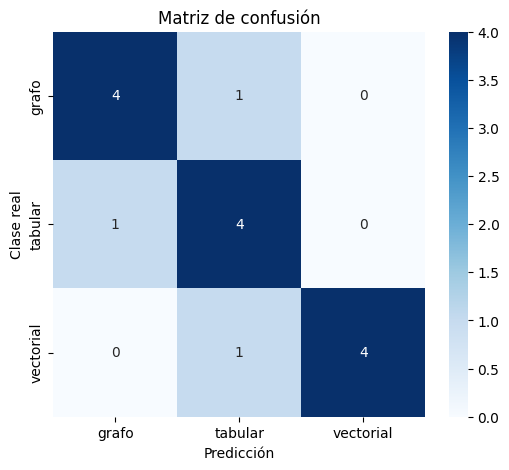

In [54]:


# 1) División en train y test
X_train, X_test, y_train, y_test = train_test_split(
    df_intenciones["texto"],
    df_intenciones["clase"],
    test_size=0.25,
    random_state=42,
    stratify=df_intenciones["clase"]
)

# 2) Vectorizador TF-IDF
vectorizer = TfidfVectorizer(
    ngram_range=(1,2),      # unigrams y bigrams
    min_df=1,               # incluye todas las palabras
    stop_words=None,        # no quitamos 'stopwords' porque son útiles
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 3) Clasificador
clf = LogisticRegression(max_iter=200)
clf.fit(X_train_tfidf, y_train)

# 4) Predicciones
y_pred = clf.predict(X_test_tfidf)

# 5) Métricas
print("\n=== MÉTRICAS DEL CLASIFICADOR TRADICIONAL ===\n")
print(classification_report(y_test, y_pred))

# 6) Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title("Matriz de confusión")
plt.ylabel("Clase real")
plt.xlabel("Predicción")
plt.show()


**Interpretación de resultados**

El clasificador tradicional muestra un desempeño equilibrado entre las tres clases, con buena estabilidad general.  
Se observa que los errores se concentran principalmente en confusiones puntuales entre *grafo* y *tabular*, lo cual es esperable dado que muchas consultas relacionales pueden incluir términos estructurados similares a los de consultas tabulares.

La clase *vectorial* presenta el comportamiento más consistente, con muy pocos errores, lo que indica que las consultas semánticas están bien diferenciadas del resto.  
En cambio, *tabular* y *grafo* muestran algún solapamiento, especialmente en el recall, lo que sugiere que algunas consultas relacionales son interpretadas como estructuradas.

En conjunto, las métricas indican un modelo estable, predecible y con errores comprensibles desde el dominio del problema.


### LLM

In [55]:
base_prompt_intencion = """
Sos un clasificador de intención para un asistente de soporte de una tienda de electrodomésticos.

Tenés TRES clases posibles de salida:
- "vectorial": cuando la consulta necesita buscar información en manuales, FAQs o reseñas de usuarios
              (problemas de uso, procedimientos, características del producto en lenguaje natural).
- "tabular": cuando la consulta se responde consultando tablas estructuradas
             (stock, precios, ventas, sucursales, clientes, cantidades, totales).
- "grafo": cuando la consulta se refiere a RELACIONES entre entidades
           (producto-categoría, producto-marca, producto-motivo de devolución, sucursal-producto, etc.).

Siempre debés responder SOLO una palabra: "vectorial", "tabular" o "grafo".

Ejemplos:

Consulta: "¿Cómo soluciono que mi licuadora vibre demasiado?"
Intención: vectorial

Consulta: "¿Cuál es el voltaje de la Procesadora P0013?"
Intención: vectorial

Consulta: "¿Dónde encuentro el manual del producto P0082?"
Intención: vectorial

Consulta: "¿Cuántas licuadoras hay en stock en Buenos Aires?"
Intención: tabular

Consulta: "Mostrame todas las ventas pagadas con Mercado Pago."
Intención: tabular

Consulta: "¿Qué cliente compró más productos en Córdoba?"
Intención: tabular

Consulta: "¿Qué productos pertenecen a la categoría Cocina?"
Intención: grafo

Consulta: "¿Qué marcas tienen productos en Lavado?"
Intención: grafo

Consulta: "¿Qué productos tienen devoluciones por 'Llegó dañado'?"
Intención: grafo

Ahora, clasificá la siguiente consulta del usuario.

Devolvé SOLO una palabra: "vectorial", "tabular" o "grafo".
"""


In [56]:
def construir_prompt_intencion(consulta_usuario: str) -> str:
    return base_prompt_intencion + f'\n\nConsulta: "{consulta_usuario}"\nIntención: '


In [57]:
def clasificar_llm(consulta_usuario: str) -> str:
    # Armamos el prompt con la función que ya tenés
    prompt = construir_prompt_intencion(consulta_usuario)

    # Llamada al modelo de Groq
    completion = client.chat.completions.create(
        model="llama-3.3-70b-versatile",   # o el modelo que indique tu profe en el cuaderno
        messages=[
            {
                "role": "system",
                "content": (
                    "Sos un clasificador de intenciones. "
                    "Dada una consulta del usuario, respondé SOLO con la etiqueta "
                    "correspondiente sin explicación adicional."
                ),
            },
            {
                "role": "user",
                "content": prompt,
            },
        ],
        temperature=0,
        max_tokens=2048,
    )


    return completion.choices[0].message.content.strip()


In [58]:
print(clasificar_llm("¿Cómo soluciono que mi licuadora vibre demasiado?"))
print(clasificar_llm("Mostrame las ventas pagadas con Mercado Pago."))
print(clasificar_llm("¿Qué productos pertenecen a la categoría Cocina?"))


vectorial
tabular
grafo


In [59]:


# Cliente Groq
client = Groq(api_key="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")


MODELO_INTENCIONES = "llama-3.3-70b-versatile"


In [60]:


def clasificar_llm_batch(textos, debug=False):
    """
    Clasifica una lista de consultas en UNA sola llamada al LLM (Groq).
    Devuelve una lista de intenciones ('vectorial', 'tabular', 'grafo')
    en el mismo orden que `textos`.
    """
    instrucciones = """
Sos un clasificador de intención para un asistente de atención al cliente.

Tenés que asignar UNA de estas intenciones a cada consulta:

- "vectorial": cuando el usuario hace una consulta semántica, tipo pregunta de cliente.
- "tabular": cuando el usuario pide listados, filtros, información estructurada sobre productos, stock, etc.
- "grafo": cuando el usuario pregunta por relaciones entre productos, categorías, motivos de devolución, etc.

Devolvé EXCLUSIVAMENTE un JSON con este formato:

{
  "predicciones": [
    {"idx": 0, "intencion": "vectorial"},
    {"idx": 1, "intencion": "tabular"},
    {"idx": 2, "intencion": "grafo"}
  ]
}

No agregues texto fuera del JSON.
"""

    lineas = [f"{idx}: {txt}" for idx, txt in enumerate(textos)]
    consultas_txt = "\n".join(lineas)
    prompt = instrucciones + "\n\nConsultas:\n" + consultas_txt

    try:
        completion = client.chat.completions.create(
            model=MODELO_INTENCIONES,
            messages=[
                {"role": "system", "content": "Sos un modelo experto en clasificación de intenciones."},
                {"role": "user", "content": prompt},
            ],
            temperature=0,
            max_tokens=2048,
        )

        raw = completion.choices[0].message.content.strip()
        if debug:
            print("=== RESPUESTA CRUDA DEL LLM ===")
            print(raw)

        # 1) limpiar fences ```json ... ```
        if raw.startswith("```"):
            raw = raw.strip("`\n ")
            if raw.lower().startswith("json"):
                raw = raw[4:].lstrip()

        # 2) intentar parseo directo
        try:
            data = json.loads(raw)
        except JSONDecodeError:
            # 3) recortar desde el primer { al último }
            start = raw.find("{")
            end = raw.rfind("}")
            if start != -1 and end != -1 and end > start:
                json_str = raw[start:end+1]
                data = json.loads(json_str)
            else:
                raise

        preds = ["ERROR"] * len(textos)
        for item in data.get("predicciones", []):
            i = item.get("idx")
            inte = str(item.get("intencion", "")).strip().lower()

            # normalización defensiva
            if inte == "tabla":
                inte = "tabular"
            if inte not in ["vectorial", "tabular", "grafo"]:
                inte = "vectorial"

            if isinstance(i, int) and 0 <= i < len(textos):
                preds[i] = inte

        return preds

    except JSONDecodeError:
        print("No pude parsear la respuesta como JSON. Respuesta cruda:")
        print(raw)
        return ["ERROR"] * len(textos)

    except Exception as e:
        print("Error del LLM al clasificar batch:", e)
        return ["ERROR"] * len(textos)


In [61]:
textos = df_intenciones["texto"].tolist()
preds = clasificar_llm_batch(textos, debug=True)
df_intenciones["pred_llm"] = preds
df_intenciones[["texto", "clase", "pred_llm"]]


=== RESPUESTA CRUDA DEL LLM ===
```json
{
  "predicciones": [
    {"idx": 0, "intencion": "vectorial"},
    {"idx": 1, "intencion": "vectorial"},
    {"idx": 2, "intencion": "tabular"},
    {"idx": 3, "intencion": "grafo"},
    {"idx": 4, "intencion": "vectorial"},
    {"idx": 5, "intencion": "grafo"},
    {"idx": 6, "intencion": "tabular"},
    {"idx": 7, "intencion": "tabular"},
    {"idx": 8, "intencion": "vectorial"},
    {"idx": 9, "intencion": "tabular"},
    {"idx": 10, "intencion": "grafo"},
    {"idx": 11, "intencion": "grafo"},
    {"idx": 12, "intencion": "tabular"},
    {"idx": 13, "intencion": "vectorial"},
    {"idx": 14, "intencion": "grafo"},
    {"idx": 15, "intencion": "vectorial"},
    {"idx": 16, "intencion": "vectorial"},
    {"idx": 17, "intencion": "vectorial"},
    {"idx": 18, "intencion": "tabular"},
    {"idx": 19, "intencion": "vectorial"},
    {"idx": 20, "intencion": "grafo"},
    {"idx": 21, "intencion": "vectorial"},
    {"idx": 22, "intencion": "tabular"

,texto,clase,pred_llm
0,¿Cómo soluciono que mi licuadora vibre demasiado?,vectorial,vectorial
1,¿Cómo limpio el bowl de la procesadora?,vectorial,vectorial
2,¿Cuántos productos hay sin stock?,tabular,tabular
3,¿Qué subcategorías existen dentro de Climatiza...,grafo,grafo
4,¿Qué capacidad tiene el vaso de la licuadora?,vectorial,vectorial
5,¿Qué productos tienen relación con fallas eléc...,grafo,grafo
6,¿Qué vendedor hizo más ventas este mes?,tabular,tabular
7,¿Qué marcas tienen más devoluciones?,grafo,tabular
8,¿Cómo se usa la función turbo de la procesadora?,vectorial,vectorial
9,¿Qué marcas venden freidoras?,grafo,tabular


In [62]:

test_idx = y_test.index

y_true = df_intenciones.loc[test_idx, "clase"]
y_pred_llm = df_intenciones.loc[test_idx, "pred_llm"]

print("=== MÉTRICAS DEL CLASIFICADOR LLM (TEST) ===\n")
print(classification_report(y_true, y_pred_llm))


=== MÉTRICAS DEL CLASIFICADOR LLM (TEST) ===

              precision    recall  f1-score   support

       grafo       1.00      0.40      0.57         5
     tabular       0.62      1.00      0.77         5
   vectorial       1.00      1.00      1.00         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.78        15
weighted avg       0.88      0.80      0.78        15



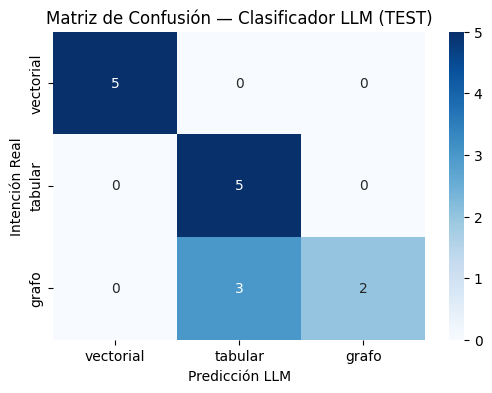

In [63]:

labels = ["vectorial", "tabular", "grafo"]

cm = confusion_matrix(y_true, y_pred_llm, labels=labels)  # labels fija el orden

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicción LLM")
plt.ylabel("Intención Real")
plt.title("Matriz de Confusión — Clasificador LLM (TEST)")
plt.show()


**Interpretación de resultados**

El clasificador basado en LLM alcanza una performance general comparable al modelo tradicional, pero con un patrón de errores diferente.  
Se destaca un recall más bajo en la clase *grafo*, lo que indica que el modelo tiende a subestimar este tipo de consultas y a derivarlas hacia *tabular*.

Esto sugiere que el LLM prioriza señales léxicas o estructurales explícitas (números, filtros, listados) por sobre la detección de relaciones implícitas entre entidades.  
Por el contrario, las clases *vectorial* y *tabular* presentan un comportamiento sólido y consistente, con pocas confusiones entre sí.

El resultado refleja una fortaleza del LLM en consultas claras, pero una mayor dificultad en capturar relaciones cuando no están formuladas de manera explícita.


### comparacion modelo manual con modelo LLM

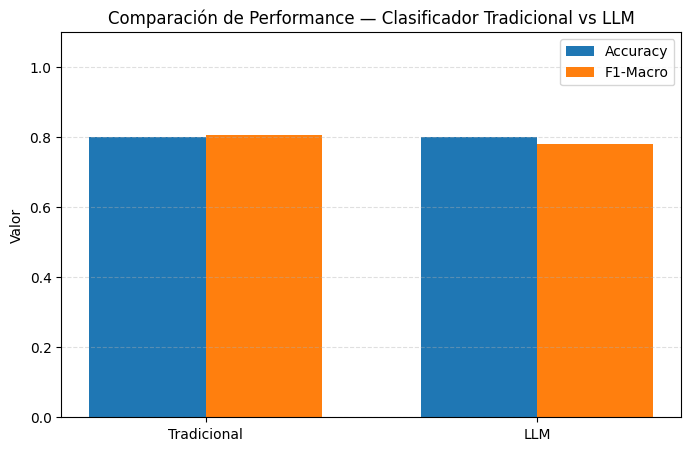

Tradicional: {'accuracy': 0.8, 'f1_macro': 0.8053872053872054}
LLM: {'accuracy': 0.8, 'f1_macro': 0.7802197802197802}


In [64]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

# Tradicional: usa y_test / y_pred (ya los tenés)
accuracy_trad = accuracy_score(y_test, y_pred)
f1_trad = f1_score(y_test, y_pred, average="macro")

# LLM: usa y_true / y_pred_llm (ya los tenés)
accuracy_llm = accuracy_score(y_true, y_pred_llm)
f1_llm = f1_score(y_true, y_pred_llm, average="macro")

modelos = ["Tradicional", "LLM"]
accuracy = [accuracy_trad, accuracy_llm]
f1_macro = [f1_trad, f1_llm]

x = np.arange(len(modelos))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, accuracy, width, label='Accuracy')
plt.bar(x + width/2, f1_macro, width, label='F1-Macro')

plt.xticks(x, modelos)
plt.ylim(0, 1.1)
plt.ylabel("Valor")
plt.title("Comparación de Performance — Clasificador Tradicional vs LLM")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

print("Tradicional:", {"accuracy": accuracy_trad, "f1_macro": f1_trad})
print("LLM:", {"accuracy": accuracy_llm, "f1_macro": f1_llm})


**Análisis comparativo**

La comparación entre ambos enfoques muestra diferencias leves pero relevantes.  
El clasificador tradicional presenta una performance ligeramente más uniforme entre clases, especialmente en *grafo*, donde mantiene un mejor balance entre precisión y recall.

El clasificador LLM, si bien logra métricas globales similares, tiende a sesgar algunas consultas relacionales hacia la clase *tabular*, afectando su recall en *grafo*.  
Esta diferencia no es extrema, pero evidencia que el enfoque supervisado resulta más estable cuando las clases están bien definidas y el dominio es acotado.

En este contexto, el modelo tradicional se comporta de manera más conservadora y consistente, mientras que el LLM ofrece flexibilidad semántica a costa de una leve pérdida de precisión en casos limítrofes.


---
El sistema incluye un clasificador de intención que enruta consultas a vectorial/tabular/grafo. Se implementó un baseline tradicional y una variante por LLM, comparándolos en el mismo conjunto de test con métricas y matrices de confusión.


---

## Pipeline de recuperacion

In [65]:
!pip install -q rank-bm25

In [139]:
from groq import Groq

from rank_bm25 import BM25Okapi
import re
import json
import unicodedata

from json import JSONDecodeError


In [140]:

GROQ_API_KEY = "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"

client = Groq(api_key=GROQ_API_KEY)

print("Cliente Groq configurado correctamente.")


Cliente Groq configurado correctamente.


In [141]:
# BM25: búsqueda por palabras clave sobre los mismos chunks que usamos para la búsqueda vectorial
def tokenizar(texto: str):

    return re.findall(r"\b\w+\b", texto.lower())

# Preparamos el corpus para BM25 a partir de los textos de cada chunk
bm25_corpus = [tokenizar(chunk["texto"]) for chunk in vector_chunks]

# Creamos el índice BM25
bm25_index = BM25Okapi(bm25_corpus)

print("Índice BM25 creado.")
print("Cantidad de documentos (chunks) indexados:", len(bm25_corpus))


Índice BM25 creado.
Cantidad de documentos (chunks) indexados: 8575


In [69]:
def buscar_bm25(query: str, k: int = 5, tipo: str | None = None):
    """
    Búsqueda por palabras clave usando BM25 sobre vector_chunks.

    Parámetros:
    - query: texto en lenguaje natural
    - k: cantidad de resultados deseados
    - tipo: None, 'manual', 'resena' o 'faq' para filtrar por tipo de documento

    Devuelve:
    - lista de diccionarios con:
        id, tipo, origen, texto, score_bm25
    """
    # Tokenizamos la consulta
    query_tokens = tokenizar(query)

    # Obtenemos los puntajes BM25 para todos los documentos
    scores = bm25_index.get_scores(query_tokens)

    # Ordenamos los índices de mayor a menor score
    indices_ordenados = np.argsort(scores)[::-1]

    resultados = []
    for idx in indices_ordenados:
        chunk = vector_chunks[idx]

        # Filtrado opcional por tipo de documento
        if tipo is not None and chunk["tipo"] != tipo:
            continue

        resultados.append({
            "id": chunk["id"],
            "tipo": chunk["tipo"],
            "origen": chunk["origen"],
            "texto": chunk["texto"],
            "score_bm25": float(scores[idx]),
        })

        if len(resultados) >= k:
            break

    return resultados


In [70]:
def combinar_resultados_hibridos(resultados_vectoriales, resultados_bm25, k_total: int = 10):
    """
    Combina resultados de búsqueda vectorial (FAISS) y BM25.
    La distancia vectorial se convierte a score para poder combinar.
    """
    combinados = {}

    def clave(r):
        return (r.get("id"), r.get("tipo"), r.get("origen"))

    # Resultados vectoriales (FAISS)
    for r in resultados_vectoriales:
        k = clave(r)

        # Convertimos distancia L2 a score (mayor = mejor)
        score_vec = 1.0 / (1.0 + float(r.get("distancia", 0.0)))

        if k not in combinados:
            combinados[k] = {
                "id": r.get("id"),
                "tipo": r.get("tipo"),
                "origen": r.get("origen"),
                "texto": r.get("texto"),
                "score_vectorial": score_vec,
                "score_bm25": 0.0,
            }
        else:
            combinados[k]["score_vectorial"] = score_vec

    # Resultados BM25
    for r in resultados_bm25:
        k = clave(r)

        if k not in combinados:
            combinados[k] = {
                "id": r.get("id"),
                "tipo": r.get("tipo"),
                "origen": r.get("origen"),
                "texto": r.get("texto"),
                "score_vectorial": 0.0,
                "score_bm25": float(r.get("score_bm25", 0.0)),
            }
        else:
            combinados[k]["score_bm25"] = float(r.get("score_bm25", 0.0))

    # Score combinado simple
    for r in combinados.values():
        r["score_combinado"] = r["score_vectorial"] + r["score_bm25"]

    # Orden final
    ordenados = sorted(
        combinados.values(),
        key=lambda x: x["score_combinado"],
        reverse=True
    )

    return ordenados[:k_total]


In [71]:
def buscar_hibrido(
    query: str,
    k_total: int = 10,
    tipo: str | None = None,
    k_vectorial: int = 10,
    k_bm25: int = 10,
):
    """
    Búsqueda híbrida sobre la base vectorial:

    - usa búsqueda semántica (FAISS) mediante buscar_vectorial(...)
    - usa búsqueda por palabras clave (BM25) mediante buscar_bm25(...)
    - combina ambos conjuntos de candidatos

    El reranking con LLM se hará en una etapa posterior.
    """
    # 1) Búsqueda semántica
    resultados_vec = buscar_vectorial(query=query, k=k_vectorial, tipo=tipo)

    # 2) Búsqueda BM25
    resultados_kw = buscar_bm25(query=query, k=k_bm25, tipo=tipo)

    # 3) Combinar
    resultados = combinar_resultados_hibridos(
        resultados_vectoriales=resultados_vec,
        resultados_bm25=resultados_kw,
        k_total=k_total,
    )

    return resultados



ejemplo = buscar_hibrido(
    "política de devoluciones por fallas técnicas",
    k_total=5
)

len(ejemplo), (ejemplo[0]["texto"][:200] + "...") if ejemplo else "sin resultados"


(5,
 '# Manual Técnico - Lavarropas Semiautomático X\n\n**Modelo:** P0236 | **Marca:** CleanMaster\n\n---\n\n## Índice\n\n1. [Especificaciones Técnicas](#especificaciones-técnicas)\n2. [Componentes Principales](#com...')

In [72]:


MODELO_RERANK = MODELO_INTENCIONES

def scorear_chunks_con_llm_batch(query: str, textos: list, debug=False):
    """
    Devuelve una lista de scores (0..1) en el mismo orden que `textos`,
    en UNA sola llamada al LLM.
    """
    instrucciones = f"""
Sos un reranker. Te doy una consulta y una lista de fragmentos (chunks).
Para cada chunk devolvé un score de relevancia entre 0 y 1 (float), donde:
- 1.0 = extremadamente relevante para responder la consulta
- 0.0 = nada relevante

Respondé EXCLUSIVAMENTE un JSON con este formato:

{{
  "scores": [
    {{"idx": 0, "score": 0.73}},
    {{"idx": 1, "score": 0.12}}
  ]
}}

No agregues texto fuera del JSON.
Consulta: "{query}"
"""

    lineas = [f'{i}: {t}' for i, t in enumerate(textos)]
    prompt = instrucciones + "\n\nChunks:\n" + "\n".join(lineas)

    completion = client.chat.completions.create(
        model=MODELO_RERANK,
        messages=[
            {"role": "system", "content": "Sos un modelo experto en reranking de información."},
            {"role": "user", "content": prompt},
        ],
        temperature=0,
        max_tokens=800,  # si aumentás k_total, subilo
    )

    raw = completion.choices[0].message.content.strip()
    if debug:
        print("=== RESPUESTA CRUDA DEL LLM (RERANK) ===")
        print(raw)

    # limpiar fences ```json ... ```
    if raw.startswith("```"):
        raw = raw.strip("`\n ")
        if raw.lower().startswith("json"):
            raw = raw[4:].lstrip()

    # parseo defensivo
    try:
        data = json.loads(raw)
    except JSONDecodeError:
        start = raw.find("{")
        end = raw.rfind("}")
        if start != -1 and end != -1 and end > start:
            data = json.loads(raw[start:end+1])
        else:
            raise

    scores = [0.0] * len(textos)
    for item in data.get("scores", []):
        i = item.get("idx")
        s = item.get("score")
        if isinstance(i, int) and 0 <= i < len(textos):
            try:
                s = float(s)
            except Exception:
                s = 0.0
            # clamp 0..1
            if s < 0: s = 0.0
            if s > 1: s = 1.0
            scores[i] = s

    return scores


def rerankear_con_llm(query: str, candidatos: list, debug=False):
    """
    Reranking LLM en UNA llamada: agrega score_llm y ordena.
    """
    textos = [c.get("texto", "") for c in candidatos]
    scores = scorear_chunks_con_llm_batch(query, textos, debug=debug)

    nuevos = []
    for c, s_llm in zip(candidatos, scores):
        nuevo = c.copy()
        nuevo["score_llm"] = s_llm
        nuevos.append(nuevo)

    ordenados = sorted(
        nuevos,
        key=lambda x: (x.get("score_llm", 0), x.get("score_combinado", 0)),
        reverse=True
    )
    return ordenados


# Smoke test
cands = buscar_hibrido("política de devoluciones por fallas técnicas", k_total=5)
rerankeados = rerankear_con_llm("política de devoluciones por fallas técnicas", cands, debug=True)

(rerankeados[0]["score_llm"], rerankeados[0]["texto"][:200] + "...")


=== RESPUESTA CRUDA DEL LLM (RERANK) ===
{
  "scores": [
    {"idx": 0, "score": 0.2},
    {"idx": 1, "score": 0.2},
    {"idx": 2, "score": 0.4},
    {"idx": 3, "score": 0.4},
    {"idx": 4, "score": 0.2}
  ]
}


(0.4,
 '# Manual Técnico - Freidora de Aire\n\n**Modelo:** P0050 | **Marca:** KitchenPro\n\n---\n\n## Índice\n\n1. [Especificaciones Técnicas](#especificaciones-técnicas)\n2. [Componentes Principales](#componentes-pri...')

In [142]:
def retrieval_vectorial(
    query: str,
    k_candidatos: int = 10,
    k_final: int = 5,
    tipo: str | None = None,
    k_vectorial: int = 10,
    k_bm25: int = 10,
):
    # 1) Búsqueda híbrida (vectorial + BM25)
    candidatos = buscar_hibrido(
        query=query,
        k_total=k_candidatos,
        tipo=tipo,
        k_vectorial=k_vectorial,
        k_bm25=k_bm25,
    )

    if not candidatos:
        return []

    # 2) Reranking con LLM
    rerankeados = rerankear_con_llm(query, candidatos)

    # 3) Cortamos a k_final
    return rerankeados[:k_final]



ejemplo_ret = retrieval_vectorial(
    "política de devoluciones por fallas técnicas",
    k_candidatos=10,
    k_final=3
)

len(ejemplo_ret), [(r["score_llm"], r.get("score_combinado", 0)) for r in ejemplo_ret]


(3,
 [(0.2, 11.171327299214811),
  (0.1, 11.171327299214811),
  (0.1, 11.170720538965892)])

In [143]:
def construir_contexto_vectorial(chunks: list, incluir_scores: bool = False) -> str:
    """
    Construye un contexto de texto concatenando los chunks recuperados.

    - No pisa ninguna función existente.
    - Se puede usar luego para alimentar al LLM generador.

    Parámetros:
    - chunks: lista de dicts devueltos por retrieval_vectorial
    - incluir_scores: si True, añade metadata mínima de score en el contexto (útil para debug)

    Devuelve:
    - un string con los textos de los chunks concatenados
    """
    partes = []

    for i, c in enumerate(chunks, start=1):
        header = f"[Documento {i} - tipo={c.get('tipo')} - origen={c.get('origen')}]"
        if incluir_scores:
            header += f" (score_llm={c.get('score_llm'):.3f}, score_comb={c.get('score_combinado', 0):.3f})"

        texto = c.get("texto", "")
        partes.append(header + "\n" + texto)

    return "\n\n---\n\n".join(partes)


# Smoke test del contexto
if ejemplo_ret:
    contexto_ejemplo = construir_contexto_vectorial(ejemplo_ret, incluir_scores=True)
    print(contexto_ejemplo[:1000] + "\n...\n")
else:
    print("Sin chunks para construir contexto.")


[Documento 1 - tipo=manual - origen=manual_P0236_Lavarropas_Semiautomático_X.md] (score_llm=0.200, score_comb=11.171)
# Manual Técnico - Lavarropas Semiautomático X

**Modelo:** P0236 | **Marca:** CleanMaster

---

## Índice

1. [Especificaciones Técnicas](#especificaciones-técnicas)
2. [Componentes Principales](#componentes-principales)
3. [Procedimientos de Uso](#procedimientos-de-uso)
4. [Compatibilidad y Relaciones](#compatibilidad-y-relaciones)
5. [Solución de Problemas](#solución-de-problemas)
6. [Mantenimiento Preventivo](#mantenimiento-preventivo)
7. [Información de Garantía](#información-de-garantía)
8. [Contacto y Soporte](#contacto-y-soporte)

---

## Especificaciones Técnicas

- **Modelo:** P0236
- **Nombre Comercial:** Lavarropas Semiautomático X
- **Categoría:** Lavado - Lavado de Ropa
- **Marca:** CleanMaster
- **Color:** Gris
- **Potencia:** 550W
- **Capacidad:** 8kg
- **Voltaje:** 110-220

---

[Documento 2 - tipo=manual - origen=manual_P0275_Lavavajillas_Compacto_2024

In [144]:
import pandas as pd

# Construimos metadata ligera para cada DataFrame en tabular_data
tabular_metadata = {}


MAX_UNIQUES = 10       # si una columna tiene pocos valores únicos, los mostramos
MAX_SAMPLE_ROWS = 3    # cantidad de filas de ejemplo por tabla

for nombre_tabla, df in tabular_data.items():
    info_columnas = []
    for col in df.columns:
        serie = df[col]
        tipo = str(serie.dtype)

        # Valores únicos (solo si son pocos)
        n_unique = serie.nunique(dropna=True)
        if n_unique <= MAX_UNIQUES:
            uniques = serie.dropna().unique().tolist()
        else:
            uniques = []

        info_columnas.append({
            "columna": col,
            "dtype": tipo,
            "n_unique": int(n_unique),
            "unique_values_sample": uniques,
        })

    # Algunas filas de ejemplo
    sample_rows = df.head(MAX_SAMPLE_ROWS).to_dict(orient="records")

    tabular_metadata[nombre_tabla] = {
        "nombre_tabla": nombre_tabla,
        "columnas": info_columnas,
        "sample_rows": sample_rows,
    }

print("Metadata tabular construida para las siguientes tablas:")
list(tabular_metadata.keys())


Metadata tabular construida para las siguientes tablas:


['productos', 'inventario', 'ventas', 'devoluciones']

In [145]:
def formatear_resultados_tabulares(resultado: dict) -> str:
    """
    Convierte los resultados de retrieval_tabular_dfmask en texto para el LLM generador.
    Muestra: tabla + filtros JSON + un resumen reducido de filas.
    """
    tabla = resultado.get("tabla", "desconocida")
    filtros_json = resultado.get("filtros_json", {})
    df = resultado.get("resultados", None)

    texto = f"Resultados tabulares (tabla='{tabla}')\n"
    texto += f"Filtros interpretados (JSON): {json.dumps(filtros_json, ensure_ascii=False)}\n\n"

    if df is None or getattr(df, "empty", True):
        texto += "No se encontraron filas relevantes.\n"
        return texto

    texto += "Filas relevantes:\n"
    texto += df.to_string(index=False)
    texto += "\n"

    return texto

print(formatear_resultados_tabulares(out))  # o out2, según tu variable


Resultados tabulares (tabla='productos')
Filtros interpretados (JSON): {"tabla": "productos", "filtros": [{"col": "categoria", "op": "contains", "val": "Lavado"}, {"col": "stock", "op": ">", "val": 0}]}

Filas relevantes:
id_producto                            nombre categoria   subcategoria       marca  precio_usd  stock    color  potencia_w capacidad  voltaje  peso_kg  garantia_meses                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [146]:

graph_schema = {
    "labels": [
        "Producto",
        "Categoria",
        "Subcategoria",
        "Marca",
        "Sucursal",
        "MotivoDevolucion",
    ],
    "relationships": [
        "PERTENECE_A",            # (Producto)-[:PERTENECE_A]->(Categoria)
        "TIENE_SUBCATEGORIA",     # (Categoria)-[:TIENE_SUBCATEGORIA]->(Subcategoria)
        "ES_DE_MARCA",            # (Producto)-[:ES_DE_MARCA]->(Marca)
        "TIENE_STOCK_DE",         # (Producto)-[:TIENE_STOCK_DE]->(Sucursal) u otro nodo de stock
        "TIENE_DEVOLUCION_MOTIVO" # (Producto)-[:TIENE_DEVOLUCION_MOTIVO]->(MotivoDevolucion)
    ],
    # Propiedades conocidas: SOLO 'id' en todos los nodos
    "node_properties": {
        "Producto": ["id"],
        "Categoria": ["id"],
        "Subcategoria": ["id"],
        "Marca": ["id"],
        "Sucursal": ["id"],
        "MotivoDevolucion": ["id"],
    }
}

print("Nuevo schema del grafo :")
graph_schema


Nuevo schema del grafo :


{'labels': ['Producto',
  'Categoria',
  'Subcategoria',
  'Marca',
  'Sucursal',
  'MotivoDevolucion'],
 'relationships': ['PERTENECE_A',
  'TIENE_SUBCATEGORIA',
  'ES_DE_MARCA',
  'TIENE_STOCK_DE',
  'TIENE_DEVOLUCION_MOTIVO'],
 'node_properties': {'Producto': ['id'],
  'Categoria': ['id'],
  'Subcategoria': ['id'],
  'Marca': ['id'],
  'Sucursal': ['id'],
  'MotivoDevolucion': ['id']}}

In [147]:
def ejecutar_cypher(driver: "Driver", cypher: str, params: dict | None = None):
    """
    Ejecuta una query Cypher en Neo4j usando el driver ya configurado.
    Devuelve una lista de diccionarios (records.data()).

    No asume nombre de base explícito para no pisar tu configuración:
    usa el valor por defecto del driver (en Aura suele ser 'neo4j').
    """
    params = params or {}

    with driver.session() as session:
        result = session.run(cypher, params)
        filas = [record.data() for record in result]

    return filas


In [148]:
def run_query(cypher):
    with driver.session() as session:
        result = session.run(cypher)
        return [record.data() for record in result]


In [149]:
categoria_map = {
    "lavado": "CATEGORIA_Lavado",
    "climatizacion": "CATEGORIA_Climatización",
    "audio": "CATEGORIA_Audio y Video",
    "audio y video": "CATEGORIA_Audio y Video",
    "cocina": "CATEGORIA_Cocina",
}

motivo_map = {
    "falla": "MOTIVO_No funciona correctamente",
    "falla técnica": "MOTIVO_No funciona correctamente",
    "no funciona": "MOTIVO_No funciona correctamente",
    "defectuoso": "MOTIVO_Producto defectuoso",
    "garantia": "MOTIVO_Problemas de garantía",
    "no cumple": "MOTIVO_No cumple expectativas",
    "llego dañado": "MOTIVO_Llegó dañado",
}

subcategoria_map = {
    "lavado de vajilla": "SUBCAT_Lavado de Vajilla",
    "lavavajillas": "SUBCAT_Lavado de Vajilla",
    "lavado de ropa": "SUBCAT_Lavado de Ropa",
    "aire acondicionado": "SUBCAT_Aires Acondicionados",
    "calefaccion": "SUBCAT_Calefacción",
    "televisor": "SUBCAT_Televisores",
}


In [150]:
categorias = run_query("""
MATCH (c:Categoria)
RETURN DISTINCT c.id AS categoria
LIMIT 50
""")

categorias


[{'categoria': 'CATEGORIA_Cocina'},
 {'categoria': 'CATEGORIA_Audio y Video'},
 {'categoria': 'CATEGORIA_Climatización'},
 {'categoria': 'CATEGORIA_Lavado'}]

In [151]:
subcategorias = run_query("""
MATCH (s:Subcategoria)
RETURN DISTINCT s.id AS subcategoria
LIMIT 50
""")

subcategorias


[{'subcategoria': 'SUBCAT_Purificación'},
 {'subcategoria': 'SUBCAT_Planchado'},
 {'subcategoria': 'SUBCAT_Preparación'},
 {'subcategoria': 'SUBCAT_Refrigeración'},
 {'subcategoria': 'SUBCAT_Ventilación'},
 {'subcategoria': 'SUBCAT_Pequeños Electrodomésticos'},
 {'subcategoria': 'SUBCAT_Cocción'},
 {'subcategoria': 'SUBCAT_Lavado de Vajilla'},
 {'subcategoria': 'SUBCAT_Secado'},
 {'subcategoria': 'SUBCAT_Calefacción'},
 {'subcategoria': 'SUBCAT_Televisores'},
 {'subcategoria': 'SUBCAT_Lavado de Ropa'},
 {'subcategoria': 'SUBCAT_Aires Acondicionados'}]

In [152]:
motivos = run_query("""
MATCH (m:MotivoDevolucion)
RETURN DISTINCT m.id AS motivo
LIMIT 50
""")

motivos


[{'motivo': 'MOTIVO_No cumple expectativas'},
 {'motivo': 'MOTIVO_No funciona correctamente'},
 {'motivo': 'MOTIVO_Diferente a la descripción'},
 {'motivo': 'MOTIVO_Producto defectuoso'},
 {'motivo': 'MOTIVO_Compra equivocada'},
 {'motivo': 'MOTIVO_Problemas de garantía'},
 {'motivo': 'MOTIVO_Llegó dañado'},
 {'motivo': 'MOTIVO_Arrepentimiento de compra'}]

In [153]:
import json

# Construimos metadata a partir de lo que ya recuperaste con run_query
lista_categorias = [c["categoria"] for c in categorias]
lista_motivos = [m["motivo"] for m in motivos]

graph_metadata = {
    "categorias": lista_categorias,
    "motivos": lista_motivos,
}

graph_metadata


{'categorias': ['CATEGORIA_Cocina',
  'CATEGORIA_Audio y Video',
  'CATEGORIA_Climatización',
  'CATEGORIA_Lavado'],
 'motivos': ['MOTIVO_No cumple expectativas',
  'MOTIVO_No funciona correctamente',
  'MOTIVO_Diferente a la descripción',
  'MOTIVO_Producto defectuoso',
  'MOTIVO_Compra equivocada',
  'MOTIVO_Problemas de garantía',
  'MOTIVO_Llegó dañado',
  'MOTIVO_Arrepentimiento de compra']}

In [154]:
import unicodedata

def normalizar_texto(t: str) -> str:
    if t is None:
        return ""
    t = t.lower()
    t = "".join(c for c in unicodedata.normalize("NFD", t)
                if unicodedata.category(c) != "Mn")
    return t

def obtener_slots_grafo_desde_llm(query_usuario: str, model: str = MODELO_INTENCIONES):
    """
    1) Intenta obtener categoria_id y motivo_id con LLM (ahora con Groq).
    2) Si el LLM no ayuda (None/parseo fallido), aplica un fallback
       de reglas simples basado en el texto del usuario y las listas
       reales de categorias y motivos.
    """

    # ---- Paso 1: intento con LLM (usando Groq) ----
    prompt = f"""
Sos un asistente que debe interpretar consultas sobre productos,
categorías y motivos de devolución en una base de grafos Neo4j.

NO debes escribir Cypher. Tu única tarea es elegir IDs válidos
para categoría y motivo de devolución, basándote en las listas reales.

Categorías disponibles (id):
{json.dumps(graph_metadata["categorias"], ensure_ascii=False, indent=2)}

Motivos de devolución disponibles (id):
{json.dumps(graph_metadata["motivos"], ensure_ascii=False, indent=2)}

Instrucciones:
- Leé la consulta del usuario.
- Si menciona una categoría (por ejemplo 'Lavado', 'Audio y Video', 'Cocina', etc.),
  elegí el id de categoría más adecuado de la lista.
- Si menciona un motivo de devolución (por ejemplo 'no funciona', 'falla técnica',
  'llegó dañado', 'no cumple expectativas', etc.),
  elegí el id de motivo más adecuado de la lista.
- Si no hay información suficiente para alguno de ellos, poné null.
- Devolvé EXCLUSIVAMENTE un JSON con este formato:

{{
  "categoria_id": <string o null>,
  "motivo_id": <string o null>
}}

Consulta del usuario:
{query_usuario}
"""

    categoria_id = None
    motivo_id = None

    try:
        completion = client.chat.completions.create(
            model=model,
            messages=[
                {"role": "system", "content": "Sos un modelo experto en extracción de slots para Cypher."},
                {"role": "user", "content": prompt},
            ],
            temperature=0,
            max_tokens=256,
        )
        raw = completion.choices[0].message.content.strip()
        slots = json.loads(raw)
        categoria_id = slots.get("categoria_id")
        motivo_id = slots.get("motivo_id")
    except Exception:
        # si falla, seguimos con fallback
        pass

    # ---- Paso 2: fallback por reglas si el LLM no encontró nada útil ----
    q_norm = normalizar_texto(query_usuario)

    if categoria_id is None:
        for cat_id in graph_metadata["categorias"]:
            base = normalizar_texto(cat_id.replace("CATEGORIA_", ""))
            if base and base in q_norm:
                categoria_id = cat_id
                break
        # caso típico "lavado" sin "categoria_"
        if categoria_id is None and "lavado" in q_norm:
            categoria_id = "CATEGORIA_Lavado"

    if motivo_id is None:
        # reglas muy simples para los motivos
        if "falla" in q_norm or "no funciona" in q_norm:
            motivo_id = "MOTIVO_No funciona correctamente"
        elif "garantia" in q_norm:
            motivo_id = "MOTIVO_Problemas de garantía"
        elif "defectu" in q_norm:
            motivo_id = "MOTIVO_Producto defectuoso"
        elif "no cumple" in q_norm or "expectativa" in q_norm:
            motivo_id = "MOTIVO_No cumple expectativas"
        elif "llego" in q_norm and "danad" in q_norm:
            motivo_id = "MOTIVO_Llegó dañado"

    return {
        "categoria_id": categoria_id,
        "motivo_id": motivo_id,
    }

In [155]:
def construir_cypher_desde_slots(slots: dict, max_resultados: int = 10):
    """
    A partir de categoria_id y motivo_id (que ya son IDs reales),
    construye una query Cypher segura.
    """
    categoria_id = slots.get("categoria_id")
    motivo_id = slots.get("motivo_id")

    cypher = "MATCH (p:Producto)\n"
    params = {}

    if categoria_id:
        cypher += "MATCH (p)-[:PERTENECE_A]->(c:Categoria {id: $categoria_id})\n"
        params["categoria_id"] = categoria_id

    if motivo_id:
        cypher += "MATCH (p)-[:TIENE_DEVOLUCION_MOTIVO]->(m:MotivoDevolucion {id: $motivo_id})\n"
        params["motivo_id"] = motivo_id

    cypher += "RETURN p.id AS producto_id\n"
    cypher += f"LIMIT {max_resultados}"

    return cypher, params


def retrieval_grafo(query_usuario: str, driver, max_resultados: int = 10):
    """
    Nuevo pipeline de retrieval sobre el grafo:

    1) El LLM elige categoria_id y motivo_id válidos (obtener_slots_grafo_desde_llm)
    2) Se construye una query Cypher segura con esos IDs
    3) Se ejecuta la query en Neo4j
    4) Se devuelven:
        - slots (para trazabilidad)
        - cypher final
        - resultados (lista de dicts)
    """
    slots = obtener_slots_grafo_desde_llm(query_usuario)
    cypher, params = construir_cypher_desde_slots(slots, max_resultados)

    filas = ejecutar_cypher(driver, cypher, params)

    return {
        "slots": slots,
        "cypher": cypher,
        "resultados": filas,
    }


# 🔎 Smoke test completo
resultado_grafo_test = retrieval_grafo(
    "mostrame productos de la categoría Lavado que tengan devoluciones por falla técnica",
    driver=driver,
    max_resultados=10
)

resultado_grafo_test


{'slots': {'categoria_id': 'CATEGORIA_Lavado',
  'motivo_id': 'MOTIVO_No funciona correctamente'},
 'cypher': 'MATCH (p:Producto)\nMATCH (p)-[:PERTENECE_A]->(c:Categoria {id: $categoria_id})\nMATCH (p)-[:TIENE_DEVOLUCION_MOTIVO]->(m:MotivoDevolucion {id: $motivo_id})\nRETURN p.id AS producto_id\nLIMIT 10',
 'resultados': [{'producto_id': 'P0287'},
  {'producto_id': 'P0246'},
  {'producto_id': 'P0248'},
  {'producto_id': 'P0249'},
  {'producto_id': 'P0252'},
  {'producto_id': 'P0235'},
  {'producto_id': 'P0253'},
  {'producto_id': 'P0232'},
  {'producto_id': 'P0233'},
  {'producto_id': 'P0255'}]}

---
Este pipeline combina búsqueda vectorial, BM25 y reranking con LLM para mejorar la calidad de los documentos recuperados.
La estrategia híbrida permite equilibrar coincidencia semántica y coincidencia léxica, mientras que el reranking final prioriza los fragmentos más útiles para responder la consulta.
El resultado es un conjunto reducido de evidencias más relevantes y coherentes para el módulo generador.

---

## LLamadas a llm

In [107]:
client = Groq(api_key=GROQ_API_KEY)
DEFAULT_MODEL = "llama-3.3-70b-versatile"


In [108]:




def llm_call(
    prompt: str,
    model: str = DEFAULT_MODEL,
    temperature: float = 0.2,
):
    """
    Función centralizada para todas las llamadas al LLM del proyecto,
    ahora usando Groq en lugar de Google Generative AI.
    """

    completion = client.chat.completions.create(
        model=model,
        messages=[
            {"role": "system", "content": "Sos un modelo experto, respondé SOLO lo pedido."},
            {"role": "user", "content": prompt},
        ],
        temperature=temperature,
        max_tokens=512,
    )

    return completion.choices[0].message.content.strip()


Chequeo basico de funcionamiento del llm

In [109]:
llm_call("Hola, ¿cómo estás?")


'Estoy funcionando correctamente.'

## Integrar para la Generación y Conversación:

In [110]:
# ==== MEMORIA DE CONVERSACIÓN ====

# Buffer simple en memoria: lista de turnos {"usuario": ..., "asistente": ...}
conversation_memory = []

def actualizar_memoria(texto_usuario: str, texto_asistente: str | None, max_turnos: int = 5):
    """
    Agrega un nuevo turno a la memoria de conversación.
    Solo guarda los últimos max_turnos intercambios.
    """
    conversation_memory.append({
        "usuario": texto_usuario,
        "asistente": texto_asistente,
    })
    # Nos quedamos solo con los últimos max_turnos
    if len(conversation_memory) > max_turnos:
        # cada elemento es un turno, así que max_turnos = cantidad de pares usuario/asistente
        conversation_memory[:] = conversation_memory[-max_turnos:]


def construir_contexto_memoria() -> str:
    """
    Convierte la memoria de conversación en un texto que pueda entender el LLM.
    """
    if not conversation_memory:
        return ""

    partes = []
    for turno in conversation_memory:
        u = turno.get("usuario") or ""
        a = turno.get("asistente") or ""
        partes.append(f"Usuario: {u}\nAsistente: {a}")

    return "\n\n".join(partes)


In [111]:
def formatear_resultados_grafo(resultado: dict) -> str:
    """
    Convierte los resultados de retrieval_grafo en texto legible
    para el LLM generador.
    """
    cypher = resultado.get("cypher", "")
    filas = resultado.get("resultados", [])

    texto = f"Resultados de la consulta al grafo usando Cypher:\n{cypher}\n\n"

    if not filas:
        texto += " La consulta al grafo no devolvió resultados.\n"
        return texto

    # columnas devueltas a partir de la primera fila
    claves = list(filas[0].keys())
    texto += "Columnas devueltas: " + ", ".join(claves) + "\n"

    for i, fila in enumerate(filas, start=1):
        pares = [f"{k}={fila.get(k)}" for k in claves]
        texto += f"- Fila {i}: " + ", ".join(pares) + "\n"

    return texto


In [117]:
# ==== ROUTER DE INTENCIÓN → FUENTE DE RAG ====

def enrutador_rag(
    query_usuario: str,
    intencion: str,
    driver,
    tabla_tabular_por_defecto: str = "productos",
    k_vectorial: int = 8,
    k_final_vectorial: int = 5,
):
    """
    Decide qué fuente de información usar según la intención ya clasificada.

    Parámetros:
    - query_usuario: texto del usuario
    - intencion: etiqueta devuelta por tu clasificador
        (ajustar el mapeo más abajo)
    - driver: conexión Neo4j para el módulo grafo
    - tabla_tabular_por_defecto: tabla a usar por defecto en consultas tabulares

    Devuelve:
    - dict con:
        * fuente: 'vectorial' | 'tabular' | 'grafo' | 'ninguna'
        * evidencia_texto: contexto a pasar al LLM
        * metadata: datos crudos (chunks, dfs, resultados grafo, etc.)
    """

    intencion_lower = intencion.lower()

    #  1) Intenciones que van a la base vectorial
    # ajustá esta lista a las etiquetas de tu clasificador
    if any(tag in intencion_lower for tag in ["manual", "faq", "vectorial", "soporte_textual"]):
        chunks = retrieval_vectorial(
            query_usuario,
            k_candidatos=k_vectorial,
            k_final=k_final_vectorial,
            tipo=None  # o 'manual' / 'resena' / 'faq'
        )
        evidencia_texto = construir_contexto_vectorial(chunks) if chunks else ""
        return {
            "fuente": "vectorial",
            "evidencia_texto": evidencia_texto,
            "metadata": {
                "chunks": chunks,
            },
        }

    #  2) Intenciones que van a datos tabulares
    if any(tag in intencion_lower for tag in ["tabla", "tabular", "producto", "stock", "precio", "venta"]):
        resultado_tab = retrieval_tabular_dfmask(query_usuario, nombre_tabla=tabla_tabular_por_defecto, max_filas=10, ids_grafo=None)
        evidencia_texto = formatear_resultados_tabulares(resultado_tab)
        return {
            "fuente": "tabular",
            "evidencia_texto": evidencia_texto,
            "metadata": resultado_tab,
        }

    # 3) Intenciones que van al grafo
    if any(tag in intencion_lower for tag in ["grafo", "relacion", "categoria", "marca", "devolucion"]):
        resultado_g = retrieval_grafo(query_usuario, driver=driver, max_resultados=10)
        evidencia_texto = formatear_resultados_grafo(resultado_g)
        return {
            "fuente": "grafo",
            "evidencia_texto": evidencia_texto,
            "metadata": resultado_g,
        }

    #  4) Intención desconocida → no usamos ninguna fuente
    return {
        "fuente": "ninguna",
        "evidencia_texto": "",
        "metadata": {},
    }

In [118]:
# ==== ARMADO DE PROMPT FINAL PARA EL LLM GENERADOR ====

def armar_prompt_final(
    pregunta_usuario: str,
    evidencia_texto: str,
    memoria_texto: str,
):
    """
    Arma el prompt completo para el LLM generador, integrando:
      - historial de conversación (memoria_texto)
      - contexto recuperado (evidencia_texto)
      - instrucción de responder en el mismo idioma y no inventar
      -si el usuario pide recomendación sin datos de catálogo, aclarar que se responde con la evidencia disponible.
    """

    if not memoria_texto:
        memoria_texto = "No hay mensajes previos relevantes."

    if not evidencia_texto:
        evidencia_texto = (
            "No se encontró información relevante en las fuentes de conocimiento "
            "(vectorial, tabular ni grafo) para esta consulta."
        )

    prompt = f"""
Actuás como un asistente experto en productos y soporte de una empresa de electrodomésticos.

Reglas generales:
- Respondé SIEMPRE en el mismo idioma que la consulta del usuario.
- Usá la información provista como CONTEXTO y MEMORIA.
- No inventes datos específicos de productos, políticas o relaciones que no estén en el contexto.
- Si la evidencia disponible no responde directamente la consulta, explicá que no hay datos suficientes
  y sugerí al usuario reformular su pregunta o dar más detalles.

MEMORIA DE CONVERSACIÓN (historial reciente):
{memoria_texto}

CONTEXTO RECUPERADO (RAG):
{evidencia_texto}

Ahora respondé a la siguiente consulta del usuario de forma clara y concisa:

Consulta del usuario:
{pregunta_usuario}
"""

    return prompt


In [119]:
# ==== AGENTE CONVERSACIONAL RAG ====

def agente_conversacional_rag(
    pregunta_usuario: str,
    driver,
    funcion_clasificador_intencion,
    tabla_tabular_por_defecto: str = "productos",
):
    """
    Bucle de un turno de conversación:

    1) Usa el clasificador de intención (modelo tradicional + LLM) para obtener la intención.
       -> funcion_clasificador_intencion debe ser una función que reciba (texto) y devuelva un string.
    2) Llama al enrutador RAG para decidir la fuente (vectorial, tabular, grafo o ninguna).
    3) Construye el prompt final combinando:
         - memoria de conversación
         - evidencia recuperada
         - instrucciones de idioma y de no inventar
    4) Llama al LLM generador (llm_call).
    5) Actualiza la memoria de conversación.
    6) Devuelve la respuesta y algo de metadata útil para debug.
    """

    # 1) Clasificación de intención
    intencion = funcion_clasificador_intencion(pregunta_usuario)

    # 2) Enrutamiento según intención
    routing = enrutador_rag(
        query_usuario=pregunta_usuario,
        intencion=intencion,
        driver=driver,
        tabla_tabular_por_defecto=tabla_tabular_por_defecto,
    )

    evidencia_texto = routing["evidencia_texto"]
    fuente = routing["fuente"]

    # 3) Construcción de memoria + prompt final
    memoria_texto = construir_contexto_memoria()
    prompt_final = armar_prompt_final(
        pregunta_usuario=pregunta_usuario,
        evidencia_texto=evidencia_texto,
        memoria_texto=memoria_texto,
    )

    # 4) Llamada al LLM generador
    respuesta = llm_call(prompt_final)

    # 5) Actualizar memoria de conversación
    actualizar_memoria(pregunta_usuario, respuesta)

    # 6) Devolver respuesta + metadata
    return {
        "respuesta": respuesta,
        "intencion": intencion,
        "fuente": fuente,
        "routing_metadata": routing["metadata"],
        "prompt_enviado": prompt_final,
    }




In [120]:
def mi_clasificador(texto: str) -> str:
    prompt = f"""
Sos un clasificador de intención. Elegí UNA sola intención:


- tabla
- grafo
- vectorial

Texto del usuario:
"{texto}"

Respondé EXCLUSIVAMENTE con una de estas palabras:  tabla, grafo, vectorial.
"""
    salida = llm_call(prompt)
    return salida.strip().lower()


In [121]:
salida = agente_conversacional_rag(
    "que licuadora me recomendas , no quiero que se rompa facil?",
    driver=driver,
    funcion_clasificador_intencion=mi_clasificador,
)

print("Intención detectada:", salida["intencion"])
print("Fuente usada:", salida["fuente"])
print("\nRespuesta del asistente:\n")
print(salida["respuesta"])


Intención detectada: tabla
Fuente usada: tabular

Respuesta del asistente:

Basándome en la información disponible, te recomiendo la Licuadora de TechHome (P0001) o la Licuadora de TechHome (P0002). Ambas tienen una garantía extendida de 36 meses, lo que sugiere que la marca tiene confianza en la durabilidad y calidad de sus productos.

La Licuadora de TechHome (P0001) tiene un motor de 650W, una jarra de 1.2L en vidrio borosilicato resistente a altas temperaturas y cuchillas de acero inoxidable 304 quirúrgico, lo que la hace ideal para preparar batidos, sopas, salsas, purés, jugos y mucho más.

La Licuadora de TechHome (P0002) tiene un motor de 300W, una jarra de 2.0L en vidrio borosilicato resistente a altas temperaturas y cuchillas de acero inoxidable 304 quirúrgico, lo que la hace ideal para preparar batidos, sopas, salsas, purés, jugos y mucho más.

Ambas licuadoras tienen características similares y una buena relación calidad-precio. Sin embargo, si buscas una licuadora más poten

---
La integración del retrieval con memoria de conversación permite mantener respuestas contextualizadas entre turnos sin perder precisión.
El enrutamiento por intención asegura que cada consulta se responda usando la fuente más adecuada (texto, tablas o grafo), evitando llamadas innecesarias.
Este enfoque mejora la coherencia conversacional y reduce el riesgo de respuestas inventadas.


---

# Ejercicio 2

## Langchain y React

In [122]:
import matplotlib.pyplot as plt
import os
import pandas as pd
from textwrap import dedent
import json
import re

In [123]:
def doc_search(query: str) -> str:
    """
    Tool: Búsqueda en documentos (manuales, FAQs, reseñas).

    Internamente:
      - Ejecuta retrieval_vectorial()
      - Aplica reranking LLM
      - Devuelve chunks textuales relevantes

    Debe devolver un string (Observation).
    """
    # implementación real va después
    pass
def table_search(query: str) -> str:
    """
    Tool: Búsqueda en tablas (DataFrames).

    Internamente:
      - Genera slots y filtros vía LLM
      - Ejecuta df.query()
      - Formatea resultados en texto

    Devuelve un string (Observation).
    """
    pass
def graph_search(query: str) -> str:
    """
    Tool: Búsqueda dinámica en Neo4j.

    Internamente:
      - LLM selecciona categoria_id / motivo_id
      - Construye query Cypher segura
      - Ejecuta la query en Neo4j
      - Devuelve nodos/relaciones relevantes

    Debe devolver texto legible para Observation.
    """
    pass
def analytics_tool(query: str) -> str:
    """
    Tool: Análisis y generación de gráficos.

    Debe:
      - Interpretar qué gráfico se necesita
      - Extraer los datos necesarios
      - Generar el gráfico con matplotlib
      - Guardarlo o devolver ruta
      - Generar una descripción textual como Observation
    """
    pass


In [125]:
# ==== TOOL: table_search (búsqueda dinámica en tablas) ====

def table_search(query: str, nombre_tabla: str = "productos", max_filas: int = 10) -> str:
    """
    Tool: Búsqueda en tablas (DataFrames de Pandas).

    Internamente:
      - Usa retrieval_tabular() para generar filtros y ejecutar df.query().
      - Usa formatear_resultados_tabulares() para convertir el resultado en texto.

    Devuelve un string (Observation) para el agente ReAct.
    """
    resultado = retrieval_tabular_dfmask(query, nombre_tabla=nombre_tabla, max_filas=max_filas)
    texto = formatear_resultados_tabulares(resultado)
    return f"table_search: resultados para la consulta '{query}':\n\n{texto}"


# ==== TOOL: graph_search (búsqueda dinámica en grafo Neo4j) ====

def graph_search(query: str, driver, max_resultados: int = 10) -> str:
    """
    Tool: Búsqueda dinámica en la base de grafos Neo4j.

    Internamente:
      - Usa retrieval_grafo() para obtener slots, Cypher y filas.
      - Usa formatear_resultados_grafo() para producir un texto legible.

    Devuelve un string (Observation) para el agente ReAct.
    """
    resultado = retrieval_grafo(query_usuario=query, driver=driver, max_resultados=max_resultados)
    texto = formatear_resultados_grafo(resultado)
    return f"graph_search: resultados para la consulta '{query}':\n\n{texto}"


In [127]:


def analytics_tool(
    query: str,
    df_ventas=df_ventas,                     # usa df_ventas global
    columna_categoria: str = "metodo_pago",
    columna_valor: str = None,
    output_path: str = "grafico_medios_pago.png"
) -> str:
    """
    Tool: Análisis y generación de gráficos a partir de datos de ventas.
    """

    # ===============================
    # VALIDACIONES
    # ===============================
    if df_ventas is None:
        return "analytics_tool: no se recibió un DataFrame válido."

    if columna_categoria not in df_ventas.columns:
        return f"analytics_tool: la columna {columna_categoria} no existe en df_ventas."

    # ===============================
    # AGRUPACIÓN
    # ===============================
    if columna_valor is None:
        conteo = df_ventas[columna_categoria].value_counts()
    else:
        if columna_valor not in df_ventas.columns:
            return f"analytics_tool: la columna {columna_valor} no existe en df_ventas."

        conteo = df_ventas.groupby(columna_categoria)[columna_valor].sum()

    # ===============================
    # GENERACIÓN DEL GRÁFICO
    # ===============================
    plt.figure(figsize=(6,6))
    plt.pie(conteo.values, labels=conteo.index, autopct="%1.1f%%", startangle=90)
    plt.title("Distribución de Métodos de Pago (por transacciones)")
    plt.tight_layout()
    plt.savefig(output_path)
    plt.close()

    # ===============================
    # TEXTO DE OBSERVACIÓN QUE DEVUELVE LA TOOL
    # ===============================
    descripcion = (
        "analytics_tool: se generó un gráfico con la distribución de los métodos de pago.\n"
        f"Archivo generado: {os.path.abspath(output_path)}\n\n"
        "Resumen numérico (cantidad de ventas por método de pago):\n"
    )

    for categoria, valor in conteo.items():
        descripcion += f"- {categoria}: {valor} ventas\n"

    return descripcion


In [135]:
obs = analytics_tool(
    "Dame un gráfico sobre la distribución de los medios de pago en base a las ventas realizadas"
)
print(obs)


analytics_tool: se generó un gráfico con la distribución de los métodos de pago.
Archivo generado: /content/grafico_medios_pago.png

Resumen numérico (cantidad de ventas por método de pago):
- Tarjeta Débito: 1315 ventas
- Tarjeta Crédito 6 cuotas: 1286 ventas
- Mercado Pago: 1285 ventas
- Transferencia Bancaria: 1265 ventas
- Tarjeta Crédito 1 pago: 1236 ventas
- Tarjeta Crédito 3 cuotas: 1220 ventas
- Tarjeta Crédito 12 cuotas: 1218 ventas
- Efectivo: 1175 ventas



In [128]:

#  Descripción de herramientas para el LLM
TOOLS_DESCRIPCION = dedent("""
- "tabla": herramienta que usa las tablas tabulares (DataFrames de Pandas)
  para responder consultas de listados, filtros y agregados simples
  sobre ventas, productos, stock, etc.

- "grafo": herramienta que consulta Neo4j para responder preguntas
  sobre relaciones entre productos, categorías, motivos de devolución,
  sucursales, marcas, etc.

- "analytics": herramienta que genera gráficos y estadísticas agregadas
  a partir de los datos de ventas (por ejemplo distribución de medios de pago).

- "vectorial": herramienta que busca en la base de conocimiento de manuales,
  FAQs o documentación usando embeddings y RAG para responder preguntas
  explicativas o de “cómo hago para…”.
""")

# Lista de nombres válidos que el LLM puede elegir
TOOL_NAMES = ["tabla", "grafo", "analytics", "vectorial"]


In [129]:

# ==== TOOL: doc_search (búsqueda en documentos de texto) ====

def doc_search(query: str, k_candidatos: int = 15, k_final: int = 5) -> str:
    """
    Tool: Búsqueda en documentos (manuales, FAQs, reseñas).

    Internamente:
      - Usa la búsqueda híbrida existente (BM25 + FAISS) para obtener candidatos.
      - Aplica reranking con LLM (score_llm + score_comb).
      - Devuelve los k_final chunks más relevantes como texto legible.

    Esta función está pensada para ser usada como Tool en el agente ReAct.
    La salida es un string (Observation).
    """

    # 1) Recuperamos candidatos con la función híbrida que ya tenés
    candidatos = buscar_hibrido(query, k_total=k_candidatos)

    if not candidatos:
        return (
            "doc_search: no se encontraron documentos relevantes para la consulta: "
            f"'{query}'."
        )

    # 2) Rerank con LLM (usa rerankear_con_llm que ya definimos)
    candidatos_rerankeados = rerankear_con_llm(query, candidatos)

    # Nos quedamos con los k_final mejores
    top = candidatos_rerankeados[:k_final]

    # 3) Armamos un texto compacto para Observation
    partes = []
    for i, cand in enumerate(top, start=1):
        tipo = cand.get("tipo", "desconocido")
        origen = cand.get("origen", "origen_desconocido")
        score = cand.get("score_combinado", cand.get("score_llm", 0.0))
        texto = cand.get("texto", "")

        partes.append(
            f"[DOC {i} | tipo={tipo} | origen={origen} | score={score:.3f}]\n"
            f"{texto}\n"
        )

    observation = (
        f"doc_search: resultados más relevantes para la consulta: '{query}'\n\n"
        + "\n".join(partes)
    )

    return observation

# ==== TOOL: table_search (búsqueda dinámica en tablas) ====

def table_search(query: str, nombre_tabla: str = "productos", max_filas: int = 10) -> str:
    """
    Tool: Búsqueda en tablas (DataFrames de Pandas).

    Internamente:
      - Usa retrieval_tabular() para generar filtros y ejecutar df.query().
      - Usa formatear_resultados_tabulares() para convertir el resultado en texto.

    Devuelve un string (Observation) para el agente ReAct.
    """
    resultado = retrieval_tabular_dfmask(query, nombre_tabla=nombre_tabla, max_filas=max_filas)
    texto = formatear_resultados_tabulares(resultado)
    return f"table_search: resultados para la consulta '{query}':\n\n{texto}"


# ==== TOOL: graph_search (búsqueda dinámica en grafo Neo4j) ====

def graph_search(query: str, driver, max_resultados: int = 10) -> str:
    """
    Tool: Búsqueda dinámica en la base de grafos Neo4j.

    Internamente:
      - Usa retrieval_grafo() para obtener slots, Cypher y filas.
      - Usa formatear_resultados_grafo() para producir un texto legible.

    Devuelve un string (Observation) para el agente ReAct.
    """
    resultado = retrieval_grafo(query_usuario=query, driver=driver, max_resultados=max_resultados)
    texto = formatear_resultados_grafo(resultado)
    return f"graph_search: resultados para la consulta '{query}':\n\n{texto}"


#  Registro global de herramientas para el agente
tool_registry = {
    "tabla": table_search,        # Ahora llama a la función table_search
    "grafo": graph_search,        # Ahora llama a la función graph_search
    "analytics": analytics_tool,  # Esta ya la tenés definida más arriba y es correcta
    "vectorial": doc_search,      # Ahora llama a la función doc_search
}

In [130]:

def elegir_tool_con_llm(pregunta: str) -> dict:
    """
    Usa el LLM para elegir UNA herramienta y explicar el motivo.
    Devuelve un dict con:
      - tool_name
      - thought

    Arregla el problema de que el modelo devuelva ```json ... ``` en lugar de JSON puro.
    """
    prompt = dedent(f"""
    Sos un agente que debe elegir UNA herramienta para responder
    la siguiente consulta del usuario.

    Tenés estas herramientas disponibles:

    {TOOLS_DESCRIPCION}

    Herramientas (nombres válidos): {TOOL_NAMES}

    Usuario:
    {pregunta}

    Instrucciones:
    - Elegí solo UNA herramienta cuyo nombre esté exactamente en la lista.
    - Explicá brevemente por qué la elegís.
    - No inventes herramientas nuevas.
    - Si ninguna herramienta sirve, devolvé 'none' como nombre.

    Respondé en JSON estricto con este formato (sin texto adicional):

    {{
      "tool_name": "<nombre de la herramienta o 'none'>",
      "thought": "<explicación breve>"
    }}
    """)

    raw = llm_call(prompt)
    texto = raw.strip()

    #  Limpieza de fences ```json ... ```
    if texto.startswith("```"):
        # elimina la primera línea ```...`
        lineas = texto.splitlines()
        if lineas[0].startswith("```"):
            lineas = lineas[1:]
        # corta en el siguiente ```
        for i, lin in enumerate(lineas):
            if lin.strip().startswith("```"):
                lineas = lineas[:i]
                break
        texto = "\n".join(lineas).strip()

    try:
        data = json.loads(texto)
    except Exception:
        # fallback: devolvemos none y dejamos el raw truncado en el thought
        data = {"tool_name": "none", "thought": f"No se pudo parsear JSON: {raw[:200]}"}
    return data


In [131]:
debug = elegir_tool_con_llm(
    "Dame un gráfico sobre la distribución de los medios de pago en base a las ventas realizadas"
)
debug


{'tool_name': 'analytics',
 'thought': "La herramienta 'analytics' es la más adecuada para generar gráficos y estadísticas agregadas a partir de los datos de ventas, como la distribución de los medios de pago."}

In [132]:
SYSTEM_PROMPT_REACT = """
Eres un agente autónomo basado en el paradigma ReAct, especializado en responder
consultas sobre productos, ventas y desempeño comercial de una empresa de
electrodomésticos.

Dispones de las siguientes herramientas:

1) doc_search
   - Propósito: recuperar información textual relevante desde manuales técnicos,
     FAQs y reseñas de usuarios.
   - Cuándo usarla: cuando el usuario pregunte por características de productos,
     modos de uso, políticas de garantía, compatibilidad o recomendaciones
     basadas en texto.

2) table_search
   - Propósito: realizar consultas dinámicas sobre tablas (DataFrames) que
     contienen información estructurada de productos, ventas y devoluciones.
   - Cuándo usarla: cuando el usuario solicite listados, filtros, rangos de
     precios, stock disponible, comparación de atributos numéricos o resúmenes
     tabulares.

3) graph_search
   - Propósito: consultar una base de grafos en Neo4j con nodos de Producto,
     Categoría, Subcategoría, Marca y Motivo de Devolución.
   - Cuándo usarla: cuando el usuario pregunte por relaciones entre productos,
     categorías, marcas, motivos de devolución o combinaciones de estos (por
     ejemplo: productos de cierta categoría con determinado motivo de devolución).

4) analytics_tool
   - Propósito: realizar análisis agregados de ventas y generar gráficos con
     matplotlib (por ejemplo, distribución de métodos de pago).
   - Cuándo usarla: cuando el usuario pida un gráfico, un análisis estadístico
     simple o una comparación agregada basada en los datos de ventas.

Reglas de razonamiento (ReAct):

- Antes de ejecutar una herramienta, debes producir un Thought donde expliques
  brevemente qué información necesitas y qué herramienta vas a usar.
- En cada paso solo puedes elegir UNA herramienta.
- La selección de Action debe ser coherente con el tipo de pregunta del usuario:
  texto -> doc_search, datos estructurados -> table_search, relaciones -> graph_search,
  análisis/gráficos de ventas -> analytics_tool.
- Después de ejecutar una herramienta, debes incorporar la Observation (resultado)
  a tu razonamiento para decidir si:
  a) ya puedes responder, o
  b) necesitas otra herramienta.
- Si la información recuperada no es suficiente o no corresponde a la pregunta,
  debes explicarlo de forma honesta y sugerir al usuario reformular la consulta.
- Siempre debes responder en el mismo idioma en el que el usuario hizo la pregunta.
- No inventes datos que no aparezcan en la Observation. Si algo no figura en las
  herramientas, deja claro que no está disponible.

Formato lógico de cada interacción interna:

1) Thought: análisis breve de qué vas a hacer y qué herramienta elegir.
2) Action: nombre de la herramienta seleccionada.
3) Action Input: texto o consulta concreta que le enviarías a la herramienta.
4) Observation: resultado devuelto por la herramienta.
5) Final Answer: respuesta final para el usuario, basada únicamente en las
   Observations obtenidas.

Tu objetivo es combinar estas herramientas y este esquema de razonamiento para
construir respuestas completas, claras y útiles para el usuario.
"""


In [133]:
def agente_react_con_traza(pregunta_usuario: str, driver=None) -> dict:
    """
    Versión del agente ReAct que devuelve:
      - thought (elección de herramienta)
      - action (tool seleccionada)
      - observation (salida de la tool)
      - final_answer (respuesta al usuario)
      - trace_text: bloque de texto con formato ReAct para el informe
    """

    # 1) LLM elige herramienta
    decision = elegir_tool_con_llm(pregunta_usuario)
    tool_name = decision.get("tool_name", "none")
    thought = decision.get("thought", "")

    if tool_name not in tool_registry:
        final_answer = (
            "He analizado tu consulta, pero ninguna de las herramientas disponibles "
            "parece adecuada para responderla de forma confiable. "
            "Te sugiero reformular la pregunta o hacerla más específica."
        )
        trace_text = (
            f"Thought: {thought}\n"
            f"Action: none\n"
            f"Action Input: {pregunta_usuario}\n"
            f"Observation: (sin ejecución de herramientas)\n"
            f"Final Answer: {final_answer}\n"
        )
        return {
            "thought": thought,
            "action": "none",
            "observation": "",
            "final_answer": final_answer,
            "trace_text": trace_text,
        }

    # 2) Ejecutar herramienta (Observation)
    try:
        tool_fn = tool_registry[tool_name]

        # Si es la tool del grafo, necesita driver
        if tool_name == "grafo":
            if driver is None:
                raise ValueError("driver es None (necesario para ejecutar graph_search)")
            observation = tool_fn(pregunta_usuario, driver=driver)
        else:
            observation = tool_fn(pregunta_usuario)

    except Exception as e:
        observation = f"Error al ejecutar la herramienta {tool_name}: {e}"

    # 3) Generar respuesta final a partir de Observation
    prompt_final = dedent(f"""
    {SYSTEM_PROMPT_REACT}

    Paso 1 - Thought:
    {thought}

    Paso 2 - Action:
    {tool_name}

    Paso 3 - Observation:
    {observation}

    Usuario:
    {pregunta_usuario}

    Ahora realizá el Paso 4 - Final Answer:
    - Explicale al usuario la respuesta en lenguaje natural.
    - Usá la información de Observation.
    - No inventes datos que no estén respaldados por Observation.
    - Respondé en el mismo idioma que la consulta original.

    Escribí SOLO la respuesta final para el usuario.
    """)

    final_answer = llm_call(prompt_final).strip()

    # 4) Armar traza en formato ReAct
    trace_text = (
        f"Thought: {thought}\n"
        f"Action: {tool_name}\n"
        f"Action Input: {pregunta_usuario}\n"
        f"Observation: {observation}\n"
        f"Final Answer: {final_answer}\n"
    )

    return {
        "thought": thought,
        "action": tool_name,
        "observation": observation,
        "final_answer": final_answer,
        "trace_text": trace_text,
    }


In [134]:
ejemplo = agente_react_con_traza(
    "Dame un gráfico sobre la distribución de los medios de pago en base a las ventas realizadas"
)

print(ejemplo["trace_text"])


Thought: La herramienta 'analytics' es la más adecuada para generar gráficos y estadísticas agregadas a partir de los datos de ventas, como la distribución de los medios de pago.
Action: analytics
Action Input: Dame un gráfico sobre la distribución de los medios de pago en base a las ventas realizadas
Observation: analytics_tool: se generó un gráfico con la distribución de los métodos de pago.
Archivo generado: /content/grafico_medios_pago.png

Resumen numérico (cantidad de ventas por método de pago):
- Tarjeta Débito: 1315 ventas
- Tarjeta Crédito 6 cuotas: 1286 ventas
- Mercado Pago: 1285 ventas
- Transferencia Bancaria: 1265 ventas
- Tarjeta Crédito 1 pago: 1236 ventas
- Tarjeta Crédito 3 cuotas: 1220 ventas
- Tarjeta Crédito 12 cuotas: 1218 ventas
- Efectivo: 1175 ventas

Final Answer: Se ha generado un gráfico que muestra la distribución de los medios de pago en base a las ventas realizadas. El gráfico se encuentra en el archivo /content/grafico_medios_pago.png. En cuanto a los da

---
El agente ReAct permite separar claramente el razonamiento, la acción y la observación, haciendo explícito el proceso de decisión.
El uso de herramientas especializadas mejora la trazabilidad y el control sobre las fuentes utilizadas en cada respuesta.
Esta arquitectura facilita el debug, la evaluación del comportamiento del agente y su extensión a nuevos tipos de herramientas.

---

Cambios realizados y mejoras implementadas

A partir de las observaciones recibidas, se realizaron ajustes orientados a mejorar la organización, claridad y funcionamiento general del trabajo práctico.

1. Orden y calidad del código
Se reorganizó el notebook por bloques funcionales,evitando importacionesredundantes dentro de un mismo bloque , eliminando celdas redundantes y comentarios innecesarios.
Se unificaron criterios de nombres, se separaron responsabilidades por funciones y se dejó cada pipeline claramente delimitado, facilitando la lectura y el mantenimiento del código.

2. Metadata en la base vectorial
Se incorporó metadata asociada a cada chunk, permitiendo filtrar y realizar búsquedas más controladas sobre la base vectorial.

3. Consultas tabulares ejecutables
Las consultas tabulares se reformularon para generar filtros directamente ejecutables sobre DataFrames, manteniendo compatibilidad conceptual con el modelo de datos del grafo y evitando parseos manuales.

4. Clasificador de intención
Se amplió y ajustó el conjunto de ejemplos utilizados para entrenamiento y validación, mejorando la estabilidad del clasificador en escenarios variados.

5. Optimización del reranker por LLM
El reranking se optimizó para evaluar múltiples chunks en una única llamada al modelo, reduciendo latencia y costo, y asegurando un ranking más consistente.

6. Ejemplos de ejecución
Se agregaron ejemplos concretos  en cada módulo principal para mostrar el comportamiento real del sistema y facilitar su verificación.

7. Claridad y calidad general
Se mejoró la legibilidad general del notebook mediante conclusiones breves por bloque, separación clara entre etapas y reducción de ruido técnico, manteniendo el foco en la lógica del sistema más que en detalles accidentales de implementación.

Aclaracion- Hay imports repetidos en muchos bloques para considerar la posibilidad de una ejecucion de un bloque en particular